In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import matplotlib as mpl
from matplotlib import font_manager,rc

OAI = pd.read_csv("Online.csv")
TFI = pd.read_csv("transfer.csv")
CTI1 = pd.read_csv("Customor.csv")
CTI1 = CTI1[CTI1["clnt_gender"]!="unknown"]
PDI = pd.read_csv("product.csv")
TFI = TFI[TFI["pd_c"]!="unknown"]

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
 pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
%matplotlib inline

Seaborn version :  0.9.0


In [5]:
#한글깨짐방지작업
font_info='c:/windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_info).get_name()
rc('font',family=font_name)

# 성별 연령별 비율

In [16]:
CTI1["clnt_age"][CTI1["clnt_age"]=="10"] = "10-20"
CTI1["clnt_age"][CTI1["clnt_age"]=="20"] = "10-20"
CTI1["clnt_age"][CTI1["clnt_age"]=="50"] = "50-60"
CTI1["clnt_age"][CTI1["clnt_age"]=="60"] = "50-60"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(c

In [7]:
df2=CTI1.groupby(['clnt_gender'])
df2=df2['clnt_id'].sum().reset_index()
df3=CTI1.groupby(['clnt_age'])
df3=df3['clnt_id'].sum().reset_index()

In [8]:
cti = CTI1
cti["count"] = 1
cti_group = pd.pivot_table(cti,index="clnt_gender",columns="clnt_age",values="count",aggfunc=np.sum)
fa=pd.DataFrame(cti_group.xs('F')).reset_index()
ma=pd.DataFrame(cti_group.xs('M')).reset_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
plt.pie(
    df2['clnt_id'],labels=df2['clnt_gender'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('성별 비율')
#df2.plot(kind='pie',title='성별 비중')
plt.savefig("성별 비중"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    df3['clnt_id'],labels=df3['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('연령대 비율')
plt.savefig("연령대 비중"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    fa['F'],labels=fa['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('여자연령대 비율')
plt.savefig("여자연령대 비중"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    ma['M'],labels=ma['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('남자연령대 비율')
plt.savefig("남자연령대 비중"+".png", bbox_inches='tight')

# 유입채널/유입경로에 따른 각 고객 검색량분포

In [9]:
merge = OAI.merge(CTI1,how = "inner", on="clnt_id")
merge = merge[merge["sech_kwd"].notnull()]

In [10]:
merge2 = merge[["sech_kwd","clnt_id","dvc_ctg_nm","clnt_age"]]
merge2= merge2[(merge2["sech_kwd"].notnull())&(merge2["dvc_ctg_nm"].notnull())]
merge2 = merge2[merge2["dvc_ctg_nm"]!="unknown"]
F_D1=merge2[merge2["dvc_ctg_nm"]=="mobile_app"].groupby(["clnt_age"]).count()["dvc_ctg_nm"].reset_index()
F_D2=merge2[(merge2.dvc_ctg_nm=="mobile_web")].groupby(["clnt_age"]).count()["dvc_ctg_nm"].reset_index()
F_D3=merge2[(merge2.dvc_ctg_nm=="PC")].groupby(["clnt_age"]).count()["dvc_ctg_nm"].reset_index()
merge2F = merge[["sech_kwd","clnt_id","clnt_gender"]]
merge2F["count"] = 1
merge2F= merge2F[(merge2F["sech_kwd"].notnull())&(merge2F["clnt_gender"].notnull())]
merge2F = merge2F[merge2F["clnt_gender"]!="unknown"]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
mat1 = merge2[merge2["dvc_ctg_nm"]=="mobile_web"].groupby('clnt_id').count()
mat2 = merge2[merge2["dvc_ctg_nm"]=="PC"].groupby('clnt_id').count()
mat3 = merge2[merge2["dvc_ctg_nm"]=="mobile_app"].groupby('clnt_id').count()
mat4 = merge2F[merge2F["clnt_gender"]=="F"].groupby('clnt_id').count()
mat5 = merge2F[merge2F["clnt_gender"]=="M"].groupby('clnt_id').count()

In [12]:
merge3 = merge[["sech_kwd","clnt_id","trfc_src","clnt_age"]]
merge3= merge3[(merge3["sech_kwd"].notnull())&(merge3["trfc_src"].notnull())]
merge3 = merge3[merge3["trfc_src"]!="unknown"]
merge2_2=merge2[["dvc_ctg_nm","sech_kwd"]].groupby('dvc_ctg_nm').count()

In [13]:
mat4 = merge3[ merge3["trfc_src"]=="DIRECT"].groupby('clnt_id').count()
mat5 =  merge3[ merge3["trfc_src"]=="PUSH"].groupby('clnt_id').count()
mat6 =  merge3[ merge3["trfc_src"]=="PORTAL_1"].groupby('clnt_id').count()
mat7 =  merge3[ merge3["trfc_src"]=="PORTAL_2"].groupby('clnt_id').count()
mat8 =  merge3[ merge3["trfc_src"]=="PORTAL_3"].groupby('clnt_id').count()
mat9 =  merge3[ merge3["trfc_src"]=="WEBSITE"].groupby('clnt_id').count()
total=merge3[["sech_kwd","clnt_id"]].groupby('clnt_id').count()

In [15]:
merge2_2=merge2[["dvc_ctg_nm","sech_kwd"]].groupby('dvc_ctg_nm').count()
merge3_3=merge3[["trfc_src","sech_kwd"]].groupby('trfc_src').count()

In [14]:
#디바이스 연령대 비율
F_D4=merge3[ merge3["trfc_src"]=="DIRECT"].groupby(["clnt_age"]).count()["trfc_src"].reset_index()
F_D5=merge3[ merge3["trfc_src"]=="PUSH"].groupby(["clnt_age"]).count()["trfc_src"].reset_index()

In [ ]:
plt.pie(
    F_D1['dvc_ctg_nm'],labels=F_D1['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('mobile app 비율')
plt.savefig("mobile app 연령대 비율"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    F_D2['dvc_ctg_nm'],labels=F_D2['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('mobile web 비율')
plt.savefig("mobile web 연령대 비율"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    F_D2['dvc_ctg_nm'],labels=F_D2['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('mobile web 비율')
plt.savefig("mobile web 연령대 비율"+".png", bbox_inches='tight')

In [ ]:
sns.distplot(mat4['sech_kwd'],

             color="red", label="여자").set(ylabel='Density',xlabel='검색량',title="성별에따른 검색량 분포")

sns.distplot(mat5['sech_kwd'], 

             color="blue", label="남자")


plt.legend(title="gender")

plt.savefig("젠더 고객들의 검색량 분포"+".png", bbox_inches='tight')
plt.show()
plt.xlim(0,800)

In [ ]:
sns.distplot(mat4['sech_kwd'],

             color="red", label="여자").set(ylabel='Density',xlabel='검색량',title="성별에따른 검색량 분포")

sns.distplot(mat5['sech_kwd'], 

             color="blue", label="남자")


plt.legend(title="gender")

plt.savefig("젠더 고객들의 검색량 분포"+".png", bbox_inches='tight')
plt.show()
plt.xlim(0,800)

In [ ]:
sns.distplot(mat4['sech_kwd'],

             color="red", label="여자").set(ylabel='Density',xlabel='검색량',title="성별에따른 검색량 분포")

sns.distplot(mat5['sech_kwd'], 

             color="blue", label="남자")


plt.legend(title="gender")

plt.savefig("젠더 고객들의 검색량 분포"+".png", bbox_inches='tight')
plt.show()
plt.xlim(0,800)

In [ ]:
sns.distplot(mat4['sech_kwd'],

             color="red", label="여자").set(ylabel='Density',xlabel='검색량',title="성별에따른 검색량 분포")

sns.distplot(mat5['sech_kwd'], 

             color="blue", label="남자")


plt.legend(title="gender")

plt.savefig("젠더 고객들의 검색량 분포"+".png", bbox_inches='tight')
plt.show()
plt.xlim(0,800)

In [ ]:
plt.pie(
    F_D4['trfc_src'],labels=F_D4['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('DIRECT 비율')
plt.savefig("DIRECT 연령대 비율"+".png", bbox_inches='tight')

In [ ]:
plt.pie(
    F_D5['trfc_src'],labels=F_D4['clnt_age'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('PUSH 비율')
plt.savefig("PUSH 연령대 비율"+".png", bbox_inches='tight')

In [ ]:
dx4=sns.distplot(mat4['sech_kwd'])
dx4.set(ylabel='Density',xlabel='검색량',title="DIRECT 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("DIRECT 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx5=sns.distplot(mat5['sech_kwd'])
dx5.set(ylabel='Density',xlabel='검색량',title="PUSH 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("PUSH 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx6=sns.distplot(mat6['sech_kwd'])
dx6.set(ylabel='Density',xlabel='검색량',title="PORTAL_1 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("PORTAL_1 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx7=sns.distplot(mat7['sech_kwd'])
dx7.set(ylabel='Density',xlabel='검색량',title="PORTAL_2 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("PORTAL_2 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx8=sns.distplot(mat8['sech_kwd'])
dx8.set(ylabel='Density',xlabel='검색량',title="PORTAL_3 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("PORTAL_3 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx9=sns.distplot(mat9['sech_kwd'])
dx9.set(ylabel='Density',xlabel='검색량',title="WEBSITE 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("WEBSITE 고객들의 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
dx10=sns.distplot(total['sech_kwd'])
dx10.set(ylabel='Density',xlabel='검색량',title="전체 고객들의 검색량 분포")
plt.xlim(0,800)
plt.savefig("전체 고객 검색량 분포"+".png", bbox_inches='tight')

In [ ]:
DV=sns.relplot(data=merge2_2,palette="tab10",kind="line")
DV.set(ylabel='총검색량',xlabel='Device',title="유입기기별 검색량")
DV.savefig("유입기기별 검색량.png")

In [ ]:
DI=sns.relplot(data=merge3_3,palette="tab10",kind="line")
DI.set(ylabel='총검색량',xlabel='유입경로',title="유입채널별 검색량")
DI.savefig("유입채널별 검색량.png")

In [ ]:
mat = merge2.groupby(['dvc_ctg_nm','clnt_id']).count().reset_index()
mat["sech_kwd"] = np.log(mat["sech_kwd"])
sns.boxplot(x = 'dvc_ctg_nm', y = 'sech_kwd', data=mat)
plt.savefig("기기유형 고객들의 박스플롯"+".png", bbox_inches='tight')

# 각연령대 선호품목(구매수량 기반)

In [16]:
merge4 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["clnt_gender","clnt_age","pd_c"]]
merge4 = merge4[merge4["pd_c"]!="unknown"]
merge4["pd_c"] = merge4["pd_c"].astype(np.int32)

In [19]:
merge4["count"] = 1
prefer_pivot = pd.pivot_table(merge4, index="pd_c", columns=["clnt_gender","clnt_age"], values='count',aggfunc=np.sum,fill_value=0)
prefer_pivotG = pd.pivot_table(merge4, index="pd_c", columns=["clnt_gender"], values='count',aggfunc=np.sum,fill_value=0)

In [20]:
a1 = prefer_pivot["F"]["10-20"].sort_values(ascending=False)[1:12].reset_index()
a2 = prefer_pivot["F"]["30"].sort_values(ascending=False)[1:12].reset_index()
a3 = prefer_pivot["F"]["40"].sort_values(ascending=False)[1:12].reset_index()
a4 = prefer_pivot["F"]["50-60"].sort_values(ascending=False)[1:12].reset_index()
a5 = prefer_pivot["M"]["10-20"].sort_values(ascending=False)[1:12].reset_index()
a6 = prefer_pivot["M"]["30"].sort_values(ascending=False)[1:12].reset_index()
a7 = prefer_pivot["M"]["40"].sort_values(ascending=False)[1:12].reset_index()
a8 = prefer_pivot["M"]["50-60"].sort_values(ascending=False)[1:12].reset_index()
aG1= prefer_pivotG["F"].sort_values(ascending=False)[1:12].reset_index()
aM1= prefer_pivotG["M"].sort_values(ascending=False)[1:12].reset_index()
a1.columns=["pd_c","counts_total"]
a2.columns=["pd_c","counts_total"]
a3.columns=["pd_c","counts_total"]
a4.columns=["pd_c","counts_total"]
a5.columns=["pd_c","counts_total"]
a6.columns=["pd_c","counts_total"]
a7.columns=["pd_c","counts_total"]
a8.columns=["pd_c","counts_total"]
aG1.columns=["pd_c","counts_total"]
aM1.columns=["pd_c","counts_total"]

In [22]:
a11 = PDI.merge(a1.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a22 = PDI.merge(a2.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a33 = PDI.merge(a3.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a44 = PDI.merge(a4.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a55 = PDI.merge(a5.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a66 = PDI.merge(a6.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a77 = PDI.merge(a7.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a88 = PDI.merge(a8.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a99 = PDI.merge(aG1.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]
a00 = PDI.merge(aM1.reset_index(), how= "inner", on="pd_c")[["pd_c","clac_nm3","counts_total"]]

In [ ]:
plt.pie(
    a99['counts_total'],labels=a99['clac_nm3'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('여성 인기제품')
plt.savefig("여성 인기제품"+".png", bbox_inches='tight')

In [ ]:
pf3=plt.pie(
    a00['counts_total'],labels=a00['clac_nm3'],shadow=False,startangle=90,autopct='%1.1f%%')
plt.title('남성 인기제품')
plt.savefig("남성 인기제품"+".png", bbox_inches='tight')

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a11).set(ylabel='clac_nm3',xlabel='총구매수',title="10-20대 여성 선호 품목")
plt.savefig("10-20대 여성 선호 품목"+".png", bbox_inches='tight')

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a22).set(ylabel='clac_nm3',xlabel='총구매수',title="30대 여성 선호 품목")
plt.savefig("30대 여성 선호 품목"+".png")

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a33).set(ylabel='clac_nm3',xlabel='총구매수',title="40대 여성 선호 품목")
plt.savefig("40대 여성 선호 품목"+".png")

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a44).set(ylabel='clac_nm3',xlabel='총구매수',title="50-60대 여성 선호 품목")
plt.savefig("50대 여성 선호 품목"+".png")

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a55).set(ylabel='clac_nm3',xlabel='총구매수',title="10-20대 남성 선호 품목")
plt.savefig("10-20대남성 인기제품"+".png", bbox_inches='tight')

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a66).set(ylabel='clac_nm3',xlabel='총구매수',title="30대 남성 선호 품목")
plt.savefig("30대남성 인기제품"+".png", bbox_inches='tight')

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a77).set(ylabel='clac_nm3',xlabel='총구매수',title="40대 남성 선호 품목")
plt.savefig("40대남성 인기제품"+".png", bbox_inches='tight')

In [ ]:
sns.catplot(x="counts_total",y="clac_nm3",kind="bar",data=a88).set(ylabel='clac_nm3',xlabel='총구매수',title="50-60대 남성 선호 품목")
plt.savefig("50-60대남성 인기제품"+".png", bbox_inches='tight')

# 각연령대 구매액 총합/평균

In [23]:
TFI = TFI[TFI["buy_am"]<100000000]
TFI.pd_c=TFI.pd_c.astype(int)
PDI.pd_c=PDI.pd_c.astype(int)
merge51 = PDI.merge(TFI,how = "inner", on="pd_c")[["clnt_id","buy_am","clac_nm1","clac_nm2","clac_nm3"]]
merge52=merge51.merge(CTI1,how = "inner", on="clnt_id")[["buy_am","clac_nm1","clac_nm2","clac_nm3","clnt_gender","clnt_age"]]
merge52['count']=1
merge531=merge52.groupby(["clnt_gender","clnt_age","clac_nm1"]).sum()["buy_am"].reset_index()
data1=merge531.sort_values(by="buy_am", ascending=False)#.iloc[0:30]
merge532=merge52.groupby(["clnt_gender","clnt_age","clac_nm2"]).sum()["buy_am"].reset_index()
data2=merge532.sort_values(by="buy_am", ascending=False)#.iloc[0:30]
merge533=merge52.groupby(["clnt_gender","clnt_age","clac_nm3"]).sum()["buy_am"].reset_index()
data3=merge533.sort_values(by="buy_am", ascending=False)#.iloc[0:30]

In [24]:
merge5 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["trans_id","clnt_gender","clnt_age","buy_am","buy_ct"]]
merge5["buy_price"] = merge5["buy_am"]
buy_group = merge5.groupby(["clnt_gender","clnt_age"]).mean()["buy_price"].reset_index()
buy_group.sort_values(by="buy_price", ascending=False)

,clnt_gender,clnt_age,buy_price
4,M,10-20,22423.678606
5,M,30,15488.340199
6,M,40,12952.577923
7,M,50-60,11447.475217
3,F,50-60,10892.458522
0,F,10-20,9019.366586
2,F,40,8312.382554
1,F,30,8101.360430


In [25]:
merge5s = TFI.merge(CTI1,how = "inner", on="clnt_id")[["trans_id","clnt_gender","clnt_age","buy_am","buy_ct"]]
merge5s["buy_price"] = merge5["buy_am"]
buy_groups = merge5s.groupby(["clnt_gender","clnt_age"]).sum()["buy_price"].reset_index()
buy_groups.sort_values(by="buy_price", ascending=False)

,clnt_gender,clnt_age,buy_price
2,F,40,1940218149
1,F,30,1345627866
3,F,50-60,970986430
6,M,40,458689642
5,M,30,366949756
7,M,50-60,170212509
0,F,10-20,149541098
4,M,10-20,69490980


In [ ]:
sns.stripplot(x="clnt_age", y="buy_am", data=data1,hue='clnt_gender',palette=['orange','green'], jitter=True).set(ylabel='평균소비금액',xlabel='나이')
plt.title("대분류 총합소비금액")
plt.savefig("대분류 총합소비금액"+".png", bbox_inches='tight')

In [ ]:
sns.stripplot(x="clnt_age", y="buy_am", data=data2,hue='clnt_gender',palette=['orange','green'], jitter=True).set(ylabel='평균소비금액',xlabel='나이')
plt.title("중분류 총합소비금액")
plt.savefig("중분류 총합소비금액"+".png", bbox_inches='tight')

In [ ]:
sns.stripplot(x="clnt_age", y="buy_am", data=data2,hue='clnt_gender',palette=['orange','green'], jitter=True).set(ylabel='평균소비금액',xlabel='나이')
plt.title("중분류 총합소비금액")
plt.savefig("중분류 총합소비금액"+".png", bbox_inches='tight')

In [ ]:
avr1=sns.catplot(x='clnt_age',y='buy_price',hue="clnt_gender",data=buy_groups,kind="bar")
avr1.set(ylabel='구매액 평균',xlabel='각 연령대',title="연령대별 F/M의 구매액총합")
avr1.savefig("연령대별 구매액총합.png")

In [ ]:
avr1=sns.catplot(x='clnt_age',y='buy_price',hue="clnt_gender",data=buy_group,kind="bar")
avr1.set(ylabel='구매액 평균',xlabel='각 연령대',title="연령대별 F/M의 구매액평균")
avr1.savefig("연령대별 구매액평균.png")

# 연령 성별 검색어

In [26]:
merge6 = OAI.merge(CTI1,how = "inner", on="clnt_id")
merge6 = merge6[merge6["sech_kwd"].notnull()]

In [27]:
mer = merge6[["sech_kwd","clnt_gender","clnt_age"]]
mer_g = merge6[["sech_kwd","clnt_gender"]]
gen1 = mer[(mer_g["clnt_gender"]=="F")]
gen2 = mer[(mer_g["clnt_gender"]=="M")]
gen1list=list(gen1.sech_kwd)
gen2list=list(gen2.sech_kwd)

In [28]:
mer1 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="10-20")]
mer2 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="30")]
mer3 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="40")]
mer4 = mer[(mer["clnt_gender"]=="F")&(mer["clnt_age"]=="50-60")]
mer5 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="10-20")]
mer6 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="30")]
mer7 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="40")]
mer8 = mer[(mer["clnt_gender"]=="M")&(mer["clnt_age"]=="50-60")]

In [29]:
mat1list=list(mer1.sech_kwd)
mat2list=list(mer2.sech_kwd)
mat3list=list(mer3.sech_kwd)
mat4list=list(mer4.sech_kwd)
mat5list=list(mer5.sech_kwd)
mat6list=list(mer6.sech_kwd)
mat7list=list(mer7.sech_kwd)
mat8list=list(mer8.sech_kwd)

In [ ]:
#여성 검색 키워드
unique_string=(" ").join(gen1list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("여성 검색 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#남성 검색 키워드
unique_string=(" ").join(gen2list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("남성 검색 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#10-20 여성 검색 키워드
unique_string=(" ").join(mat1list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("10-20대 여성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#30대 여성 검색 키워드
unique_string=(" ").join(mat2list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("30대 여성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#40대 여성 검색 키워드
unique_string=(" ").join(mat3list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("40대 여성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#50-60 여성 검색 키워드
unique_string=(" ").join(mat4list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("50-60대 여성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#10-20 남성 검색 키워드
unique_string=(" ").join(mat5list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("10-20대 남성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#30 남성 검색 키워드
unique_string=(" ").join(mat6list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("30대 남성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#40 남성 검색 키워드
unique_string=(" ").join(mat7list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("40대 남성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
#50-60 남성 검색 키워드
unique_string=(" ").join(mat8list)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("50-60대 남성 키워드"+".png", bbox_inches='tight')
plt.show()
plt.close()

# 검색대비 구매

In [30]:
oai6 = OAI[OAI["action_type"]==6][["clnt_id","sess_id", "sess_dt","hit_tm","trans_id"]].reset_index(drop=True)
oai0 = OAI[OAI["action_type"]==0][["clnt_id","sess_id", "sess_dt","hit_tm","sech_kwd"]].reset_index(drop=True)

In [31]:
from tqdm import tqdm
pd_c_list = {}
oai6["sech_count"] = 0
for row in tqdm(range(oai6.shape[0])):
    data = oai6.iloc[row,]
    sech = len(oai0[(oai0["clnt_id"]==data["clnt_id"])&(oai0["sess_id"]==data["sess_id"])]["sech_kwd"])
    oai6["sech_count"][row] = oai6["sech_count"][row]+sech

  0%|                                                                                        | 0/56249 [00:00<?, ?it/s]C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|████████████████████████████████████████████████████████████████████████████| 56249/56249 [10:15<00:00, 91.41it/s]


In [33]:
sech_count = oai6.groupby(["clnt_id","trans_id"]).sum()["sech_count"].reset_index()
sech_count[sech_count==0] = 100000000000

In [34]:
tfi_g = TFI[["clnt_id", "trans_id","pd_c"]]
tfi_g["buy_count"] = 1
tfi_group = pd.pivot_table(tfi_g,index=["clnt_id","trans_id"],values="buy_count",aggfunc=np.sum).reset_index()
tfi_group
merge4 = tfi_group.merge(sech_count,on = ["clnt_id","trans_id"])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
buy_prop = pd.DataFrame([merge4["clnt_id"],merge4["trans_id"],round((merge4["buy_count"]/merge4["sech_count"]),5)]).T
buy_prop.rename(columns = {"Unnamed 0": "buy_prop"}, inplace = True)

In [36]:
merge9 = buy_prop.merge(CTI1,how = "inner", on="clnt_id")[["clnt_id","clnt_gender","clnt_age","buy_prop"]]
merge9
merge9f=merge9[merge9.clnt_gender=="F"]
merge9m=merge9[merge9.clnt_gender=="M"]

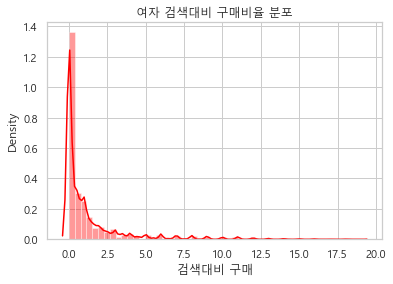

In [92]:
sns.distplot(merge9f['buy_prop'],

             color="red", label="여자").set(ylabel='Density',xlabel='검색대비 구매',title="여자 검색대비 구매비율 분포")
plt.savefig("여자 검색량 대비 구매비율"+".png", bbox_inches='tight')

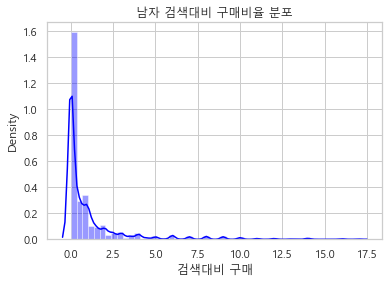

In [93]:
sns.distplot(merge9m['buy_prop'], 

             color="blue", label="남자").set(ylabel='Density',xlabel='검색대비 구매',title="남자 검색대비 구매비율 분포")
plt.savefig("남자 검색량 대비 구매비율"+".png", bbox_inches='tight')

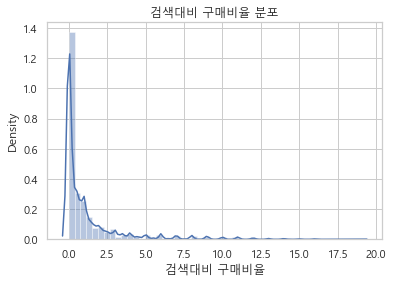

In [94]:
sns.distplot(buy_prop['buy_prop'])
plt.title('검색대비 구매비율 분포')

plt.xlabel('검색대비 구매비율')

plt.ylabel('Density')

plt.savefig("검색대비 구매비율 분포"+".png", bbox_inches='tight')
plt.show()

# 요일별 구매금액/수량 총합

In [37]:
TFI = TFI[TFI["buy_am"]<100000000]
tfi1 = TFI[["de_dt","buy_am","buy_ct"]]
tfi1['de_dt'] = pd.to_datetime(tfi1['de_dt'], format='%Y%m%d')
tfi1['day_of_week'] = tfi1["de_dt"].dt.dayofweek

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
t2=tfi1[["day_of_week","buy_am"]].groupby("day_of_week",as_index=True)["buy_am"].sum()
t3=tfi1[["day_of_week","buy_ct"]].groupby("day_of_week",as_index=True)["buy_ct"].sum()

In [97]:
t4=tfi1[["day_of_week","buy_am"]].groupby("day_of_week",as_index=True)["buy_am"].mean()
t5=tfi1[["day_of_week","buy_ct"]].groupby("day_of_week",as_index=True)["buy_ct"].mean()

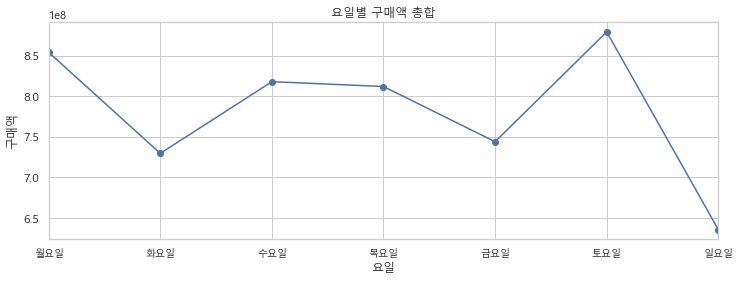

In [95]:
t2_p = t2.plot(marker="o", title='요일별 구매액 총합', figsize=(12, 4), legend=False, fontsize=12)
t2_p.set_xlabel('요일', fontsize=12)          # x축 정보 표시
t2_p.set_ylabel('구매액', fontsize=12)  
t2_p.set_xticklabels(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],fontsize=10,rotation=0)
plt.savefig("요일별 구매액 총합"+".png", bbox_inches='tight')

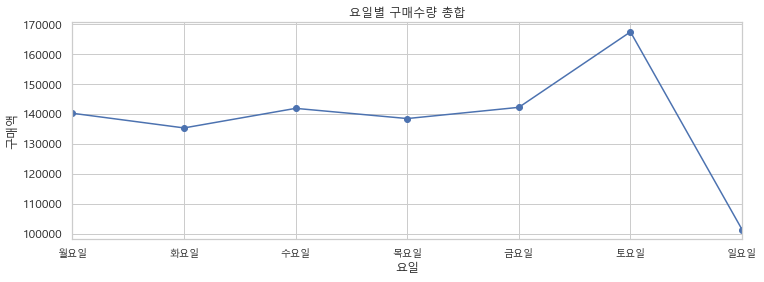

In [101]:
t3_p = t3.plot(marker="o", title='요일별 구매수량 총합', figsize=(12, 4), legend=False, fontsize=12)
t3_p.set_xlabel('요일', fontsize=12)          # x축 정보 표시
t3_p.set_ylabel('구매액', fontsize=12)  
t3_p.set_xticklabels(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],fontsize=10,rotation=0)
plt.savefig("요일별 구매수량 총합"+".png", bbox_inches='tight')

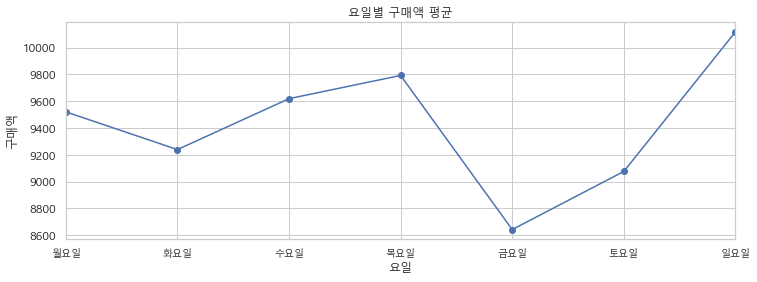

In [100]:
t4_p = t4.plot(marker="o", title='요일별 구매액 평균', figsize=(12, 4), legend=False, fontsize=12)
t4_p.set_xlabel('요일', fontsize=12)          # x축 정보 표시
t4_p.set_ylabel('구매액', fontsize=12)  
t4_p.set_xticklabels(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],fontsize=10,rotation=0)
plt.savefig("요일별 구매액 평균"+".png", bbox_inches='tight')

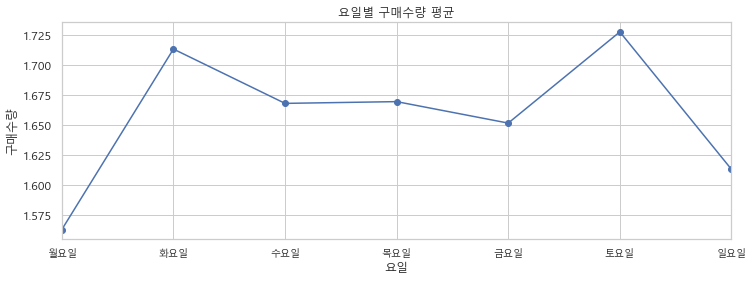

In [99]:
t5_p = t5.plot(marker="o", title='요일별 구매수량 평균', figsize=(12, 4), legend=False, fontsize=12)
t5_p.set_xlabel('요일', fontsize=12)          # x축 정보 표시
t5_p.set_ylabel('구매수량', fontsize=12)  
t5_p.set_xticklabels(['월요일','화요일','수요일','목요일','금요일','토요일','일요일'],fontsize=10,rotation=0)
plt.savefig("요일별 구매수량 평균"+".png", bbox_inches='tight')

# 시간과 구매금액의 관계

In [5]:
TFI = TFI[TFI["buy_am"]<100000000]
merge11 = TFI.merge(CTI1,how = "inner", on="clnt_id")[["clnt_id","pd_c","de_tm","de_dt","clnt_gender","clnt_age","buy_am","buy_ct"]]
merge11 = merge11[merge11["pd_c"]!="unknown"]
merge11["pd_c"] = merge11["pd_c"].astype(np.int32)

In [41]:
tb5=merge11[["de_tm","buy_am","clnt_gender","clnt_id"]]
tb5.groupby("clnt_gender")
tb5.sort_values(by="buy_am", ascending=False)

,de_tm,buy_am,clnt_gender,clnt_id
328757,15:16,11800000,M,43143
350008,13:44,11578450,F,5492
328730,17:09,10500000,M,43143
328729,16:03,10500000,M,43143
328731,17:16,10500000,M,43143
...,...,...,...,...
158475,19:48,0,F,5879
224901,16:51,0,F,37769
158438,11:44,0,F,42006
224902,16:51,0,F,37769


In [42]:
tb5['de_tm'] = pd.to_datetime(tb5['de_tm'], errors='coerce')
tb6=tb5.groupby(["clnt_gender", tb5.de_tm.dt.hour+1]).buy_am.mean().reset_index()
tb9=tb5.groupby(["clnt_gender", tb5.de_tm.dt.hour+1]).buy_am.sum().reset_index()
tb7=tb5.groupby([ tb5.de_tm.dt.hour+1]).buy_am.sum().reset_index()
tb8=tb5.groupby([ tb5.de_tm.dt.hour+1]).buy_am.mean().reset_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
tb5=merge11[["de_tm","buy_am","clnt_gender","clnt_id"]]
tb5.groupby("clnt_gender")
tb5['de_tm'] = pd.to_datetime(tb5['de_tm'], errors='coerce')
tb6=tb5.groupby(["clnt_gender", tb5.de_tm.dt.hour+1]).buy_am.mean().reset_index()
tb9=tb5.groupby(["clnt_gender", tb5.de_tm.dt.hour+1]).buy_am.sum().reset_index()
tb7=tb5.groupby([ tb5.de_tm.dt.hour+1]).buy_am.sum().reset_index()
tb8=tb5.groupby([ tb5.de_tm.dt.hour+1]).buy_am.mean().reset_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


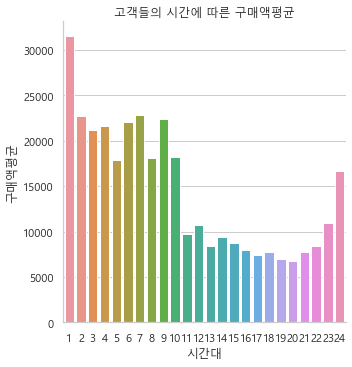

In [102]:
tb8_p=sns.catplot(x="de_tm",y="buy_am",kind="bar",data=tb8)
tb8_p.set(ylabel='구매액평균',xlabel='시간대',title="고객들의 시간에 따른 구매액평균")
plt.savefig("고객들의 시간에 따른 구매액평균"+".png", bbox_inches='tight')

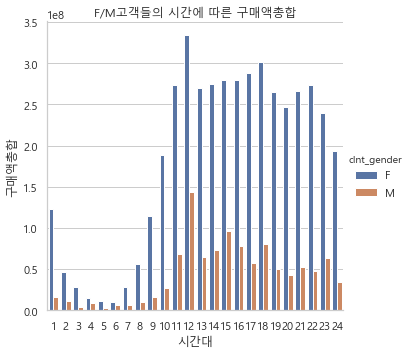

In [103]:
tb9_p=sns.catplot(x="de_tm",y="buy_am",hue="clnt_gender",kind="bar",data=tb9)
tb9_p.set(ylabel='구매액총합',xlabel='시간대',title="F/M고객들의 시간에 따른 구매액총합")
plt.savefig("고객들의 시간에 따른 F,M 구매액총합"+".png", bbox_inches='tight')

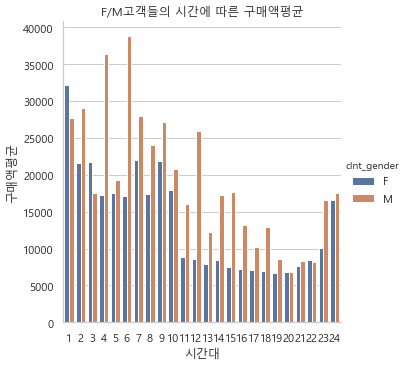

In [104]:
tb6_p=sns.catplot(x="de_tm",y="buy_am",hue="clnt_gender",kind="bar",data=tb6)
tb6_p.set(ylabel='구매액평균',xlabel='시간대',title="F/M고객들의 시간에 따른 구매액평균")
plt.savefig("시간대별 성별에 따른 구매평균"+".png", bbox_inches='tight')

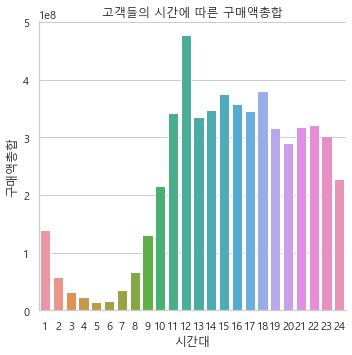

In [105]:
tb7_p=sns.catplot(x="de_tm", y="buy_am", data=tb7,kind='bar')
tb7_p.set(ylabel='구매액총합',xlabel='시간대',title="고객들의 시간에 따른 구매액총합")
plt.savefig("고객들의 시간에 따른 구매액총합"+".png", bbox_inches='tight')

# 요일별 성별 각연령대 인기상품(중분류 구매횟수)

In [6]:
a=merge11.as_matrix(columns=None)
time1= pd.DatetimeIndex(merge11['de_tm'])
time1=time1.hour
re=pd.DataFrame(time1)
b=re.as_matrix(columns=None)
c=np.concatenate((a, b), axis=1)
new=pd.DataFrame(c)
new.columns=["clnt_id","pd_c","de_tm","de_dt","clnt_gender","clnt_age","buy_am","buy_ct","hour"]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [10]:
merge_new = new.merge(PDI,how = "inner", on="pd_c")[["hour","clnt_id","pd_c","de_dt","clnt_gender","clnt_age","buy_am","buy_ct","clac_nm1","clac_nm2","clac_nm3"]]
merge_new['de_dt'] = pd.to_datetime(merge_new['de_dt'], format='%Y%m%d')
merge_new['weekday'] = merge_new["de_dt"].dt.dayofweek
merge_new['count']=1

In [11]:
#시간에 따른 사이트 이용 고객수
cn=merge_new[['clnt_id','hour']].groupby('hour',as_index=False).count()

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47480 missing from current

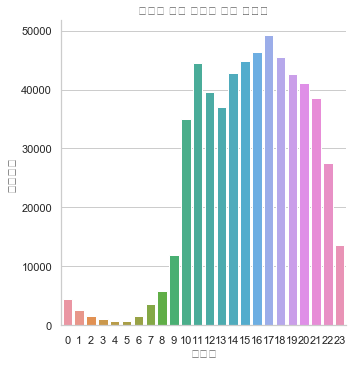

In [12]:
cn_p=sns.catplot(x="hour", y="clnt_id", data=cn,kind='bar')
cn_p.set(ylabel='이용자수',xlabel='시간대',title="시간에 따른 사이트 이용 고객수")
plt.savefig("시간에 따른 사이트 이용 고객수"+".png", bbox_inches='tight')

In [15]:
new_pivot = pd.pivot_table(merge_new, index=["clac_nm3"], columns=["clnt_gender","clnt_age","weekday"], values='count',aggfunc=np.sum,fill_value = 0)
new_pivot.groupby('clac_nm3')
new_pivot

clnt_gender                      F                             ...  M        \
clnt_age                        10                   20        ... 50         
weekday                          0  1  2  3  4  5  6  0  1  2  ...  4  5  6   
clac_nm3                                                       ...            
                                 0  0  0  0  0  0  0  0  0  0  ...  0  0  0   
Accessory Bags                   0  0  0  0  0  0  0  0  0  0  ...  0  0  0   
Accident Prevention Equipment    0  0  0  0  0  0  0  0  0  0  ...  0  0  0   
Adhesive Tapes                   0  0  0  0  0  0  0  0  1  0  ...  1  0  0   
Adhesives                        0  0  0  0  0  0  0  0  2  0  ...  0  0  0   
...                             .. .. .. .. .. .. .. .. .. ..  ... .. .. ..   
Young Radishes                   0  0  0  0  0  0  0  2  1  0  ...  0  0  1   
Yuzus / Quinces                  0  0  0  0  0  0  0  0  0  0  ...  0  1  0   
Zipper Poly Bags / Plastic Bags  0  0  0  0  0  1  0  3  3  2  ...  2  0  0   
kelp                             0  0  0  0  0  0  0  0  0  0  ...  0  0  0   
life Vests / Safety Accessories  0  0  0  0  0  0  0  0  0  0  ...  0  0  0   

clnt_gender                                           
clnt_age                        60                    
weekday                          0  1  2  3  4  5  6  
clac_nm3                                              
                                 0  0  0  0  0  0  0  
Accessory Bags                   0  0  0  0  0  0  0  
Accident Prevention Equipment    0  0  0  0  0  0  0  
Adhesive Tapes                   0  0  0  0  0  0  0  
Adhesives                        2  0  0  0  0  0  0  
...                             .. .. .. .. .. .. ..  
Young Radishes                   0  0  0  0  0  0  0  
Yuzus / Quinces                  0  0  0  0  0  0  0  
Zipper Poly Bags / Plastic Bags  0  2  0  0  0  0  2  
kelp                             2  0  1  0  0  0  0  
life Vests / Safety Accessories  0  0  0  0  0  0  0  

[1662 rows x 84 columns]

In [14]:
    F10=new_pivot["F"]["10-20"][0].sort_values(ascending=False)[1:8].reset_index()
    F30=new_pivot["F"]["30"][0].sort_values(ascending=False)[1:8].reset_index()
    F40=new_pivot["F"]["40"][0].sort_values(ascending=False)[1:8].reset_index()
    F50=new_pivot["F"]["50-60"][0].sort_values(ascending=False)[1:8].reset_index()
    M10=new_pivot["M"]["10-20"][0].sort_values(ascending=False)[1:8].reset_index()
    M30=new_pivot["M"]["30"][0].sort_values(ascending=False)[1:8].reset_index()
    M40=new_pivot["M"]["40"][0].sort_values(ascending=False)[1:8].reset_index()
    M50=new_pivot["M"]["50-60"][0].sort_values(ascending=False)[1:8].reset_index()
    
    F10.columns=["product","counts_total"] 
    F30.columns=["product","counts_total"]  
    F40.columns=["product","counts_total"]
    F50.columns=["product","counts_total"]
    M10.columns=["product","counts_total"] 
    M30.columns=["product","counts_total"]  
    M40.columns=["product","counts_total"]
    M50.columns=["product","counts_total"]

KeyError: '10-20'

In [119]:
    F11=new_pivot["F"]["10-20"][1].sort_values(ascending=False)[1:8].reset_index()
    F31=new_pivot["F"]["30"][1].sort_values(ascending=False)[1:8].reset_index()
    F41=new_pivot["F"]["40"][1].sort_values(ascending=False)[1:8].reset_index()
    F51=new_pivot["F"]["50-60"][1].sort_values(ascending=False)[1:8].reset_index()
    M11=new_pivot["M"]["10-20"][1].sort_values(ascending=False)[1:8].reset_index()
    M31=new_pivot["M"]["30"][1].sort_values(ascending=False)[1:8].reset_index()
    M41=new_pivot["M"]["40"][1].sort_values(ascending=False)[1:8].reset_index()
    M51=new_pivot["M"]["50-60"][1].sort_values(ascending=False)[1:8].reset_index()
    
    F11.columns=["product","counts_total"] 
    F31.columns=["product","counts_total"]  
    F41.columns=["product","counts_total"]
    F51.columns=["product","counts_total"]
    M11.columns=["product","counts_total"] 
    M31.columns=["product","counts_total"]  
    M41.columns=["product","counts_total"]
    M51.columns=["product","counts_total"]

In [148]:
    F12=new_pivot["F"]["10-20"][2].sort_values(ascending=False)[1:8].reset_index()
    F32=new_pivot["F"]["30"][2].sort_values(ascending=False)[1:8].reset_index()
    F42=new_pivot["F"]["40"][2].sort_values(ascending=False)[1:8].reset_index()
    F52=new_pivot["F"]["50-60"][2].sort_values(ascending=False)[1:8].reset_index()
    M12=new_pivot["M"]["10-20"][2].sort_values(ascending=False)[1:8].reset_index()
    M32=new_pivot["M"]["30"][2].sort_values(ascending=False)[1:8].reset_index()
    M42=new_pivot["M"]["40"][2].sort_values(ascending=False)[1:8].reset_index()
    M52=new_pivot["M"]["50-60"][2].sort_values(ascending=False)[1:8].reset_index()
    
    F12.columns=["product","counts_total"] 
    F32.columns=["product","counts_total"]  
    F42.columns=["product","counts_total"]
    F52.columns=["product","counts_total"]
    M12.columns=["product","counts_total"] 
    M32.columns=["product","counts_total"]  
    M42.columns=["product","counts_total"]
    M52.columns=["product","counts_total"]

In [120]:
    F13=new_pivot["F"]["10-20"][3].sort_values(ascending=False)[1:8].reset_index()
    F33=new_pivot["F"]["30"][3].sort_values(ascending=False)[1:8].reset_index()
    F43=new_pivot["F"]["40"][3].sort_values(ascending=False)[1:8].reset_index()
    F53=new_pivot["F"]["50-60"][3].sort_values(ascending=False)[1:8].reset_index()
    M13=new_pivot["F"]["10-20"][3].sort_values(ascending=False)[1:8].reset_index()
    M33=new_pivot["F"]["30"][3].sort_values(ascending=False)[1:8].reset_index()
    M43=new_pivot["F"]["40"][3].sort_values(ascending=False)[1:8].reset_index()
    M53=new_pivot["F"]["50-60"][3].sort_values(ascending=False)[1:8].reset_index()
    
    F13.columns=["product","counts_total"] 
    F33.columns=["product","counts_total"]  
    F43.columns=["product","counts_total"]
    F53.columns=["product","counts_total"]
    M13.columns=["product","counts_total"] 
    M33.columns=["product","counts_total"]  
    M43.columns=["product","counts_total"]
    M53.columns=["product","counts_total"]

In [121]:
    F14=new_pivot["F"]["10-20"][4].sort_values(ascending=False)[1:8].reset_index()
    F34=new_pivot["F"]["30"][4].sort_values(ascending=False)[1:8].reset_index()
    F44=new_pivot["F"]["40"][4].sort_values(ascending=False)[1:8].reset_index()
    F54=new_pivot["F"]["50-60"][4].sort_values(ascending=False)[1:8].reset_index()
    M14=new_pivot["M"]["10-20"][4].sort_values(ascending=False)[1:8].reset_index()
    M34=new_pivot["M"]["30"][4].sort_values(ascending=False)[1:8].reset_index()
    M44=new_pivot["M"]["40"][4].sort_values(ascending=False)[1:8].reset_index()
    M54=new_pivot["M"]["50-60"][4].sort_values(ascending=False)[1:8].reset_index()
    
    F14.columns=["product","counts_total"] 
    F34.columns=["product","counts_total"]  
    F44.columns=["product","counts_total"]
    F54.columns=["product","counts_total"]
    M14.columns=["product","counts_total"] 
    M34.columns=["product","counts_total"]  
    M44.columns=["product","counts_total"]
    M54.columns=["product","counts_total"]
    
    F15=new_pivot["F"]["10-20"][5].sort_values(ascending=False)[1:8].reset_index()
    F35=new_pivot["F"]["30"][5].sort_values(ascending=False)[1:8].reset_index()
    F45=new_pivot["F"]["40"][5].sort_values(ascending=False)[1:8].reset_index()
    F55=new_pivot["F"]["50-60"][5].sort_values(ascending=False)[1:8].reset_index()
    M15=new_pivot["M"]["10-20"][5].sort_values(ascending=False)[1:8].reset_index()
    M35=new_pivot["M"]["30"][5].sort_values(ascending=False)[1:8].reset_index()
    M45=new_pivot["M"]["40"][5].sort_values(ascending=False)[1:8].reset_index()
    M55=new_pivot["M"]["50-60"][5].sort_values(ascending=False)[1:8].reset_index()
    
    F15.columns=["product","counts_total"] 
    F35.columns=["product","counts_total"]  
    F45.columns=["product","counts_total"]
    F55.columns=["product","counts_total"]
    M15.columns=["product","counts_total"] 
    M35.columns=["product","counts_total"]  
    M45.columns=["product","counts_total"]
    M55.columns=["product","counts_total"]
    
    F16=new_pivot["F"]["10-20"][6].sort_values(ascending=False)[1:8].reset_index()
    F36=new_pivot["F"]["30"][6].sort_values(ascending=False)[1:8].reset_index()
    F46=new_pivot["F"]["40"][6].sort_values(ascending=False)[1:8].reset_index()
    F56=new_pivot["F"]["50-60"][6].sort_values(ascending=False)[1:8].reset_index()
    M16=new_pivot["M"]["10-20"][6].sort_values(ascending=False)[1:8].reset_index()
    M36=new_pivot["M"]["30"][6].sort_values(ascending=False)[1:8].reset_index()
    M46=new_pivot["M"]["40"][6].sort_values(ascending=False)[1:8].reset_index()
    M56=new_pivot["M"]["50-60"][6].sort_values(ascending=False)[1:8].reset_index()
    
    F16.columns=["product","counts_total"] 
    F36.columns=["product","counts_total"]  
    F46.columns=["product","counts_total"]
    F56.columns=["product","counts_total"]
    M16.columns=["product","counts_total"] 
    M36.columns=["product","counts_total"]  
    M46.columns=["product","counts_total"]
    M56.columns=["product","counts_total"]    

In [131]:
merge_new

,hour,clnt_id,pd_c,de_dt,clnt_gender,clnt_age,buy_am,clac_nm3,count,weekday
0,3,39423,565,2019-09-20,F,50-60,2990,Bananas,1,4
1,3,39423,565,2019-07-03,F,50-60,2890,Bananas,1,2
2,4,39423,565,2019-09-30,F,50-60,3290,Bananas,1,0
3,3,39423,565,2019-07-21,F,50-60,4990,Bananas,1,6
4,2,21279,565,2019-09-20,F,40,2990,Bananas,1,4
...,...,...,...,...,...,...,...,...,...,...
582303,2,53632,258,2019-08-14,M,50-60,77040,Printer Inks / Toners,1,2
582304,2,1499,1303,2019-09-04,F,50-60,29000,Women's Climbing Vests,1,2
582305,2,58443,263,2019-09-18,F,30,568000,Tablet PCs,1,2
582306,1,21232,263,2019-09-18,F,30,362500,Tablet PCs,1,2


In [160]:
merge_new1 = new.merge(PDI,how = "inner", on="pd_c")[["hour","clnt_id","pd_c","clnt_gender","clac_nm1","clac_nm2","clac_nm3"]]
merge_new1["count"] = 1
merge_new1['de_dt'] = pd.to_datetime(merge_new['de_dt'], format='%Y%m%d')
merge_new1['weekday'] = merge_new["de_dt"].dt.dayofweek
merge_new1.groupby("weekday")

In [135]:
merge_new1["hour"][merge_new1["hour"]==0] = 4
merge_new1["hour"][merge_new1["hour"]==1] = 1
merge_new1["hour"][merge_new1["hour"]==2] = 1
merge_new1["hour"][merge_new1["hour"]==3] = 1
merge_new1["hour"][merge_new1["hour"]==4] = 1
merge_new1["hour"][merge_new1["hour"]==5] = 1
merge_new1["hour"][merge_new1["hour"]==6] = 1
merge_new1["hour"][merge_new1["hour"]==7] = 2
merge_new1["hour"][merge_new1["hour"]==8] = 2
merge_new1["hour"][merge_new1["hour"]==9] = 2
merge_new1["hour"][merge_new1["hour"]==10] = 2
merge_new1["hour"][merge_new1["hour"]==11] = 2
merge_new1["hour"][merge_new1["hour"]==12] = 3
merge_new1["hour"][merge_new1["hour"]==13] = 3
merge_new1["hour"][merge_new1["hour"]==14] = 3
merge_new1["hour"][merge_new1["hour"]==15] = 3
merge_new1["hour"][merge_new1["hour"]==16] = 3
merge_new1["hour"][merge_new1["hour"]==17] = 3
merge_new1["hour"][merge_new1["hour"]==18] = 4
merge_new1["hour"][merge_new1["hour"]==19] = 4
merge_new1["hour"][merge_new1["hour"]==20] = 4
merge_new1["hour"][merge_new1["hour"]==21] = 4
merge_new1["hour"][merge_new1["hour"]==22] = 4
merge_new1["hour"][merge_new1["hour"]==23] = 4

In [140]:
time_pivot = pd.pivot_table(merge_new1, index=["clac_nm2"], columns=["clnt_gender","hour"], values='count',aggfunc=np.sum,fill_value = 0)
time_pivot.groupby('clac_nm2')

In [141]:
t11=time_pivot["F"][1].sort_values(ascending=False)[1:8].reset_index()
t22=time_pivot["F"][2].sort_values(ascending=False)[1:8].reset_index()
t33=time_pivot["F"][3].sort_values(ascending=False)[1:8].reset_index()
t44=time_pivot["F"][4].sort_values(ascending=False)[1:8].reset_index()
t55=time_pivot["M"][1].sort_values(ascending=False)[1:8].reset_index()
t66=time_pivot["M"][2].sort_values(ascending=False)[1:8].reset_index()
t77=time_pivot["M"][3].sort_values(ascending=False)[1:8].reset_index()
t88=time_pivot["M"][4].sort_values(ascending=False)[1:8].reset_index()



t11.columns=["product","counts_total"] 
t22.columns=["product","counts_total"]  
t33.columns=["product","counts_total"]
t44.columns=["product","counts_total"]
t55.columns=["product","counts_total"] 
t66.columns=["product","counts_total"]  
t77.columns=["product","counts_total"] 
t88.columns=["product","counts_total"] 

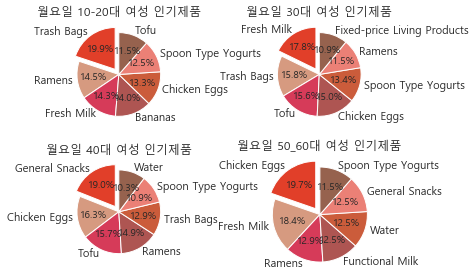

In [142]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.subplot(2,2,1)
plt.pie(
    F10['counts_total'],labels=F10['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F30['counts_total'],labels=F30['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F40['counts_total'],labels=F40['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F50['counts_total'],labels=F50['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 50_60대 여성 인기제품')

# View the plot drop above
plt.axis('equal')

plt.tight_layout() 

plt.savefig("월요일 여성 인기제품"+".png")

plt.show()

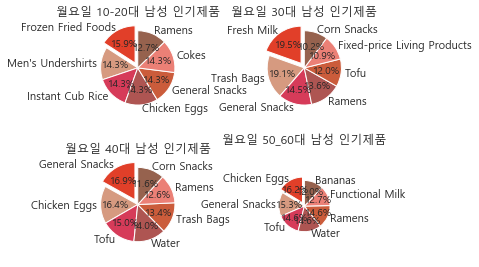

<Figure size 432x288 with 0 Axes>

In [143]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.subplot(2,2,1)
plt.pie(
    M10['counts_total'],labels=M10['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M30['counts_total'],labels=M30['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M40['counts_total'],labels=M40['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M50['counts_total'],labels=M50['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 50_60대 남성 인기제품')

# View the plot drop above
plt.axis('equal')

# View the plot
#pf3.set(title="10-20대 남성 선호 품목")
plt.tight_layout()
#plt.title('월요일 10-20대 여성 인기제품')
plt.show()
plt.savefig("월요일 남성 인기제품"+".png", bbox_inches='tight')

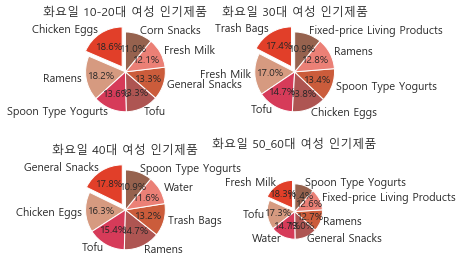

<Figure size 432x288 with 0 Axes>

In [144]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.subplot(2,2,1)
plt.pie(
    F11['counts_total'],labels=F11['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F31['counts_total'],labels=F31['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F41['counts_total'],labels=F41['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F51['counts_total'],labels=F51['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 50_60대 여성 인기제품')

# View the plot drop above
plt.axis('equal')

# View the plot
#pf3.set(title="10-20대 남성 선호 품목")
plt.tight_layout()
#plt.title('월요일 10-20대 여성 인기제품')
plt.show()
plt.savefig("화요일 여성 인기제품"+".png", bbox_inches='tight')

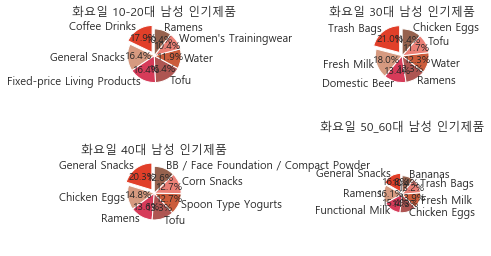

<Figure size 432x288 with 0 Axes>

In [145]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.subplot(2,2,1)
plt.pie(
    M11['counts_total'],labels=M11['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M31['counts_total'],labels=M31['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M41['counts_total'],labels=M41['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M51['counts_total'],labels=M51['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 50_60대 남성 인기제품')

# View the plot drop above
plt.axis('equal')

plt.tight_layout()

plt.savefig("화요일 남성 인기제품"+".png", bbox_inches='tight')

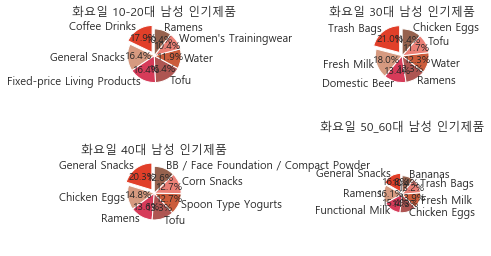

<Figure size 432x288 with 0 Axes>

In [146]:

colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

plt.subplot(2,2,1)
plt.pie(
    M11['counts_total'],labels=M11['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M31['counts_total'],labels=M31['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M41['counts_total'],labels=M41['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M51['counts_total'],labels=M51['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()

plt.show()
plt.savefig("화요일 남성 인기제품"+".png", bbox_inches='tight')

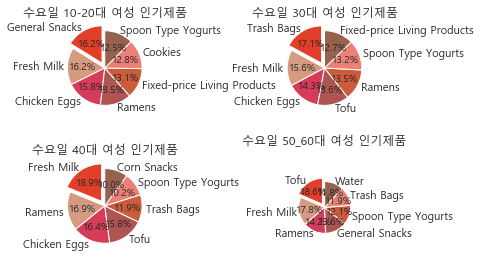

In [149]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    F12['counts_total'],labels=F12['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F32['counts_total'],labels=F32['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F42['counts_total'],labels=F42['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F52['counts_total'],labels=F52['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 50_60대 여성 인기제품')

plt.axis('equal')


plt.tight_layout()

plt.savefig("수요일 여성 인기제품"+".png", bbox_inches='tight')

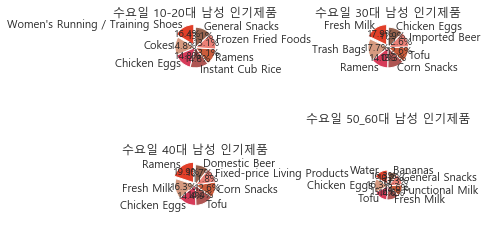

In [150]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

plt.subplot(2,2,1)
plt.pie(
    M12['counts_total'],labels=M12['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M32['counts_total'],labels=M32['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M42['counts_total'],labels=M42['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M52['counts_total'],labels=M52['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('수요일 50_60대 남성 인기제품')

plt.axis('equal')


plt.tight_layout()

    
plt.savefig("수요일 남성 인기제품"+".png", bbox_inches='tight')

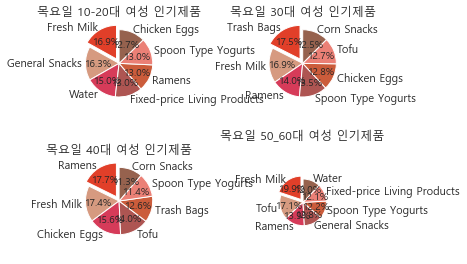

In [151]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.subplot(2,2,1)
plt.pie(
    F13['counts_total'],labels=F13['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F33['counts_total'],labels=F33['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F43['counts_total'],labels=F43['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F53['counts_total'],labels=F53['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 50_60대 여성 인기제품')

# View the plot drop above
plt.axis('equal')

plt.tight_layout()


plt.savefig("목요일 여성 인기제품"+".png", bbox_inches='tight')

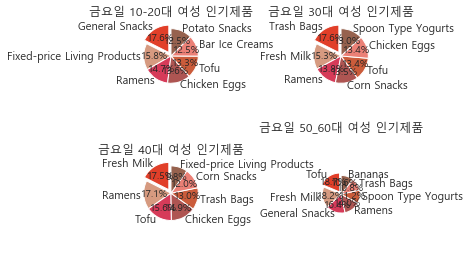

In [152]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

plt.subplot(2,2,1)
plt.pie(
    F14['counts_total'],labels=F14['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F34['counts_total'],labels=F34['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F44['counts_total'],labels=F44['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F54['counts_total'],labels=F54['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 50_60대 여성 인기제품')

plt.axis('equal')

plt.tight_layout()
plt.savefig("금요일 여성 인기제품"+".png", bbox_inches='tight')

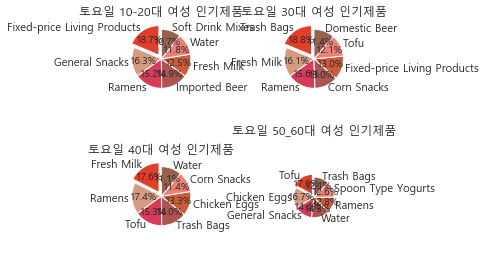

In [153]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    F15['counts_total'],labels=F15['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F35['counts_total'],labels=F35['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F45['counts_total'],labels=F45['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F55['counts_total'],labels=F55['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 50_60대 여성 인기제품')


plt.axis('equal')

plt.tight_layout()
plt.savefig("토요일 여성 인기제품"+".png", bbox_inches='tight')

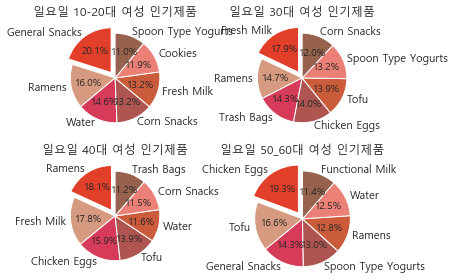

In [154]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    F16['counts_total'],labels=F16['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F36['counts_total'],labels=F36['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F46['counts_total'],labels=F46['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F56['counts_total'],labels=F56['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 50_60대 여성 인기제품')


plt.axis('equal')
plt.tight_layout()
plt.savefig("일요일 여성 인기제품"+".png", bbox_inches='tight')

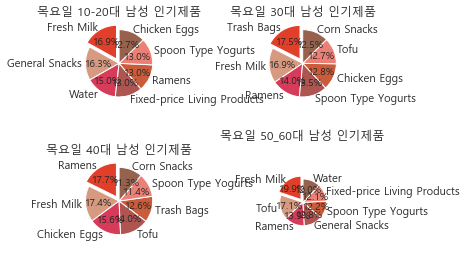

In [156]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    M13['counts_total'],labels=M13['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M33['counts_total'],labels=M33['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M43['counts_total'],labels=M43['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M53['counts_total'],labels=M53['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('목요일 50_60대 남성 인기제품')


plt.axis('equal')
plt.tight_layout()
plt.savefig("목요일 남성 인기제품"+".png", bbox_inches='tight')

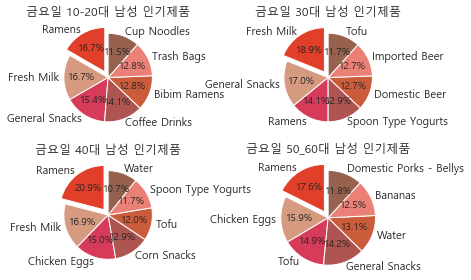

In [157]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    M14['counts_total'],labels=M14['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M34['counts_total'],labels=M34['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M44['counts_total'],labels=M44['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M54['counts_total'],labels=M54['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('금요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()

plt.savefig("금요일 남성 인기제품"+".png", bbox_inches='tight')

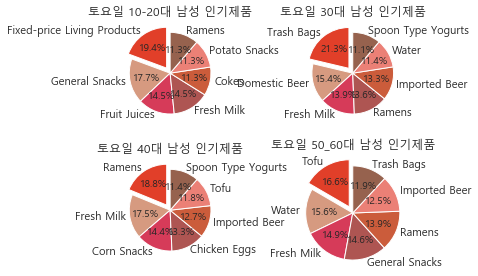

In [158]:

colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    M15['counts_total'],labels=M15['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M35['counts_total'],labels=M35['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M45['counts_total'],labels=M45['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M55['counts_total'],labels=M55['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('토요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()

plt.savefig("토요일 남성 인기제품"+".png", bbox_inches='tight')

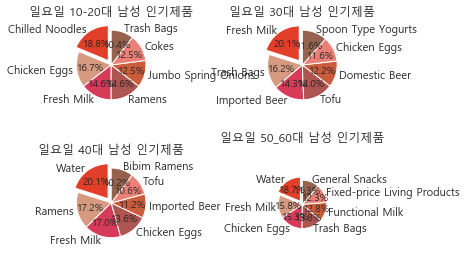

In [159]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

#
plt.subplot(2,2,1)
plt.pie(
    M16['counts_total'],labels=M16['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M36['counts_total'],labels=M36['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M46['counts_total'],labels=M46['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M56['counts_total'],labels=M56['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('일요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()
plt.savefig("일요일 남성 인기제품"+".png", bbox_inches='tight')

# 요일에 따른 대분류 구매금액과 횟수

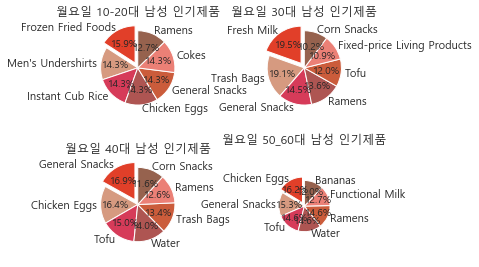

<Figure size 432x288 with 0 Axes>

In [112]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    M10['counts_total'],labels=M10['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M30['counts_total'],labels=M30['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M40['counts_total'],labels=M40['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M50['counts_total'],labels=M50['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('월요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()

plt.show()
plt.savefig("월요일 남성 인기제품"+".png", bbox_inches='tight')

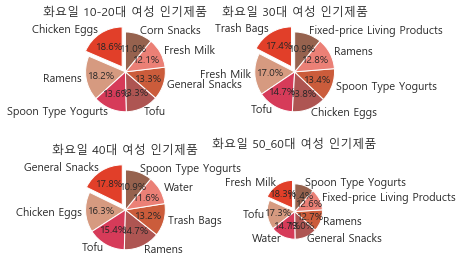

<Figure size 432x288 with 0 Axes>

In [113]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    F11['counts_total'],labels=F11['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 10-20대 여성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    F31['counts_total'],labels=F31['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 30대 여성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    F41['counts_total'],labels=F41['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 40대 여성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    F51['counts_total'],labels=F51['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 50_60대 여성 인기제품')


plt.axis('equal')


plt.tight_layout()

plt.show()

plt.savefig("화요일 여성 인기제품"+".png", bbox_inches='tight')

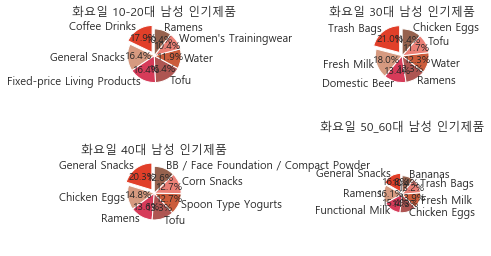

<Figure size 432x288 with 0 Axes>

In [162]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]


plt.subplot(2,2,1)
plt.pie(
    M11['counts_total'],labels=M11['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 10-20대 남성 인기제품')

pf3 = plt.subplot(2,2,2)
pf3=plt.pie(
    M31['counts_total'],labels=M31['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 30대 남성 인기제품')

pf3 = plt.subplot(2,2,3)
pf3=plt.pie(
    M41['counts_total'],labels=M41['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 40대 남성 인기제품')

pf3 = plt.subplot(2,2,4)
pf3=plt.pie(
    M51['counts_total'],labels=M51['product'],shadow=False,colors=colors,explode=(0.15,0,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title('화요일 50_60대 남성 인기제품')


plt.axis('equal')

plt.tight_layout()

plt.show()

plt.savefig("화요일 남성 인기제품"+".png", bbox_inches='tight')

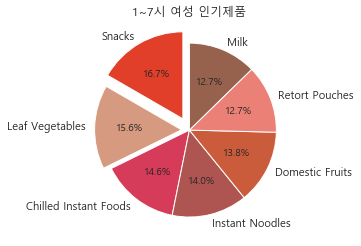

In [164]:
plt.pie(
    t11['counts_total'],labels=t11['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("1~7시 여성 인기제품")
plt.savefig("1~7시 여성 인기제품"+".png", bbox_inches='tight')

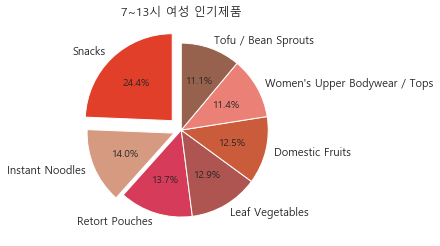

In [165]:
plt.pie(
    t22['counts_total'],labels=t22['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("7~13시 여성 인기제품")
plt.savefig("7~13시 여성 인기제품"+".png", bbox_inches='tight')

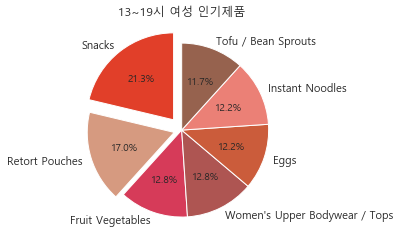

In [166]:
plt.pie(
    t33['counts_total'],labels=t33['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("13~19시 여성 인기제품")
plt.savefig("13~19시 여성 인기제품"+".png", bbox_inches='tight')

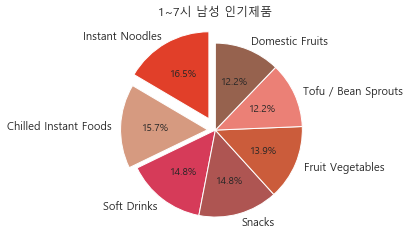

In [167]:
plt.pie(
    t55['counts_total'],labels=t55['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("1~7시 남성 인기제품")
plt.savefig("1~7시 남성 인기제품"+".png", bbox_inches='tight')

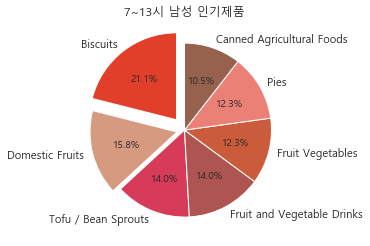

In [168]:
plt.pie(
    t66['counts_total'],labels=t66['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("7~13시 남성 인기제품")
plt.savefig("7~13시 남성 인기제품"+".png", bbox_inches='tight')

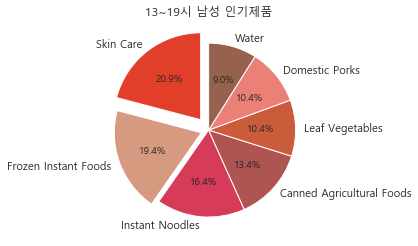

In [169]:
plt.pie(
    t77['counts_total'],labels=t77['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("13~19시 남성 인기제품")
plt.savefig("13시~19시 남성 인기제품"+".png", bbox_inches='tight')

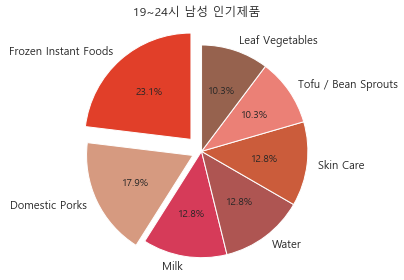

<Figure size 432x288 with 0 Axes>

In [170]:
plt.pie(
    t88['counts_total'],labels=t88['product'],shadow=False,colors=colors,explode=(0.15,0.09,0, 0, 0, 0, 0),startangle=90,autopct='%1.1f%%')
plt.title("19~24시 남성 인기제품")
plt.axis('equal')

plt.tight_layout()
plt.show()
plt.savefig("19~24시 남성 인기제품"+".png", bbox_inches='tight')

# 요일에 따른 대분류 구매금액과 횟수

In [66]:
clac1=merge_new[["clac_nm1","buy_am","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac2=merge_new[["clac_nm1","buy_am","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]

In [67]:
clac_nm1pre=merge_new[["weekday","clac_nm1","buy_am","buy_ct"]]
mon=clac_nm1pre[clac_nm1pre["weekday"]==0]
clac_nm1pre1=mon[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre2=mon[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
tue=clac_nm1pre.loc[(clac_nm1pre["weekday"]==1),:]
clac_nm1pre14=tue[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre3=tue[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
wed=clac_nm1pre.loc[(clac_nm1pre["weekday"]==2),:]
clac_nm1pre4=wed[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre5=wed[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
tur=clac_nm1pre.loc[(clac_nm1pre["weekday"]==3),:]
clac_nm1pre6=tue[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre7=tue[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
fri=clac_nm1pre.loc[(clac_nm1pre["weekday"]==4),:]
clac_nm1pre8=fri[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre9=fri[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
sat=clac_nm1pre.loc[(clac_nm1pre["weekday"]==5),:]
clac_nm1pre10=sat[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre11=sat[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]
sun=clac_nm1pre.loc[(clac_nm1pre["weekday"]==6),:]
clac_nm1pre12=sun[["clac_nm1","buy_am"]].groupby(["clac_nm1"]).sum()["buy_am"].sort_values(ascending=False).iloc[1:15]
clac_nm1pre13=sun[["clac_nm1","buy_ct"]].groupby(["clac_nm1"]).sum()["buy_ct"].sort_values(ascending=False).iloc[1:15]


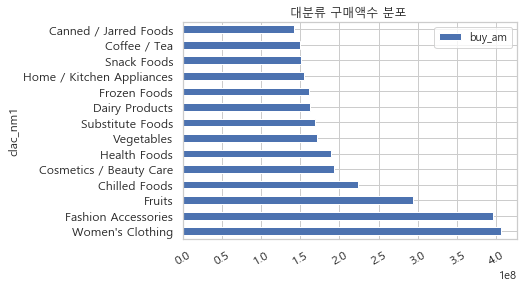

In [171]:
clac1.plot(kind="barh", title='대분류 구매액수 분포 ', legend=True, fontsize=12)
plt.xticks(rotation = 30 )
plt.savefig("대분류 구매액수 분포.png")

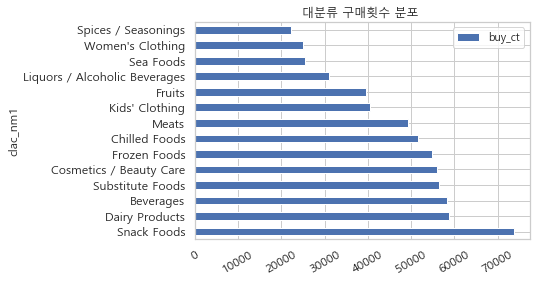

In [172]:
clac2.plot(kind="barh", title='대분류 구매횟수 분포 ', legend=True, fontsize=12)
plt.xticks(rotation = 30 )
plt.savefig("대분류 구매횟수 분포.png")

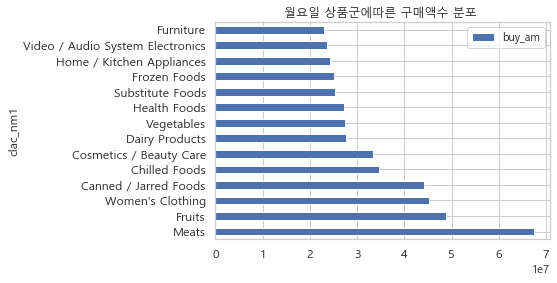

In [173]:
clac_nm1pre1.plot(kind="barh", title='월요일 상품군에따른 구매액수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 20 )
plt.savefig(" 월요일 상품군에따른 구매액수 분포.png", bbox_inches='tight')

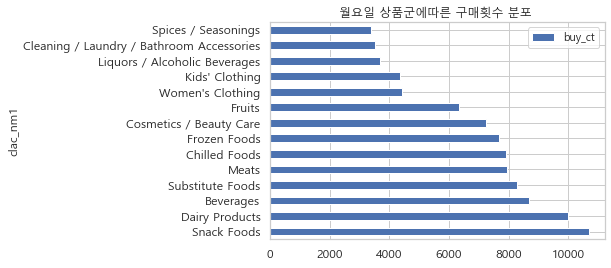

In [174]:
clac_nm1pre2.plot(kind="barh", title='월요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 월요일 상품군에따른 구매횟수 분포.png", bbox_inches='tight')

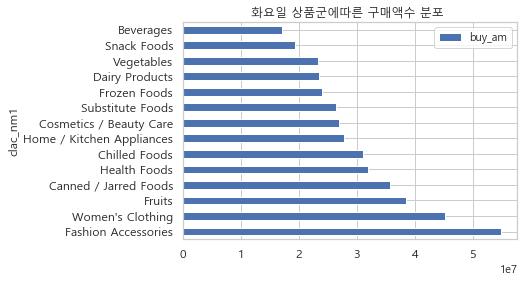

In [175]:
clac_nm1pre14.plot(kind="barh", title='화요일 상품군에따른 구매액수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 화요일 상품군에따른 구매액수 분포.png" ,bbox_inches='tight')

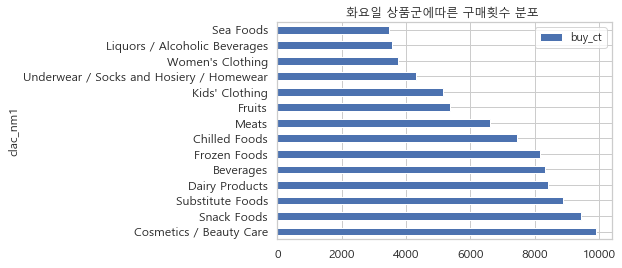

In [176]:
clac_nm1pre3.plot(kind="barh", title='화요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 화요일 상품군에따른 구매횟수 분포.png" ,bbox_inches='tight')

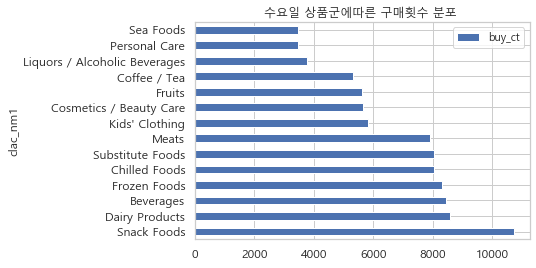

In [177]:
clac_nm1pre5.plot(kind="barh", title='수요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 수요일 상품군에따른 구매횟수 분포.png", bbox_inches='tight')

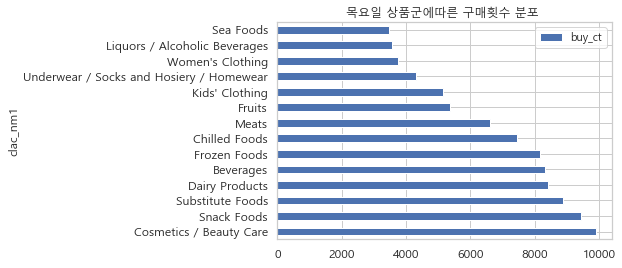

In [178]:
clac_nm1pre7.plot(kind="barh", title='목요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 목요일 상품군에따른 구매횟수 분포.png", bbox_inches='tight')

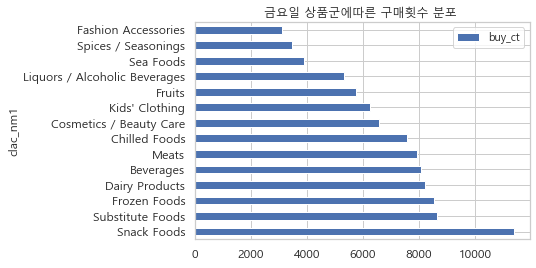

In [179]:
clac_nm1pre9.plot(kind="barh", title='금요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 금요일 상품군에따른 구매횟수 분포.png", bbox_inches='tight')

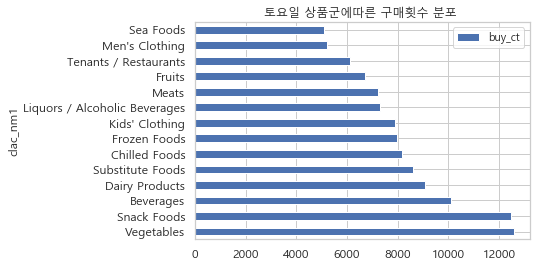

In [180]:
clac_nm1pre11.plot(kind="barh", title='토요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 토요일 상품군에따른 구매횟수 분포.png" ,bbox_inches='tight')

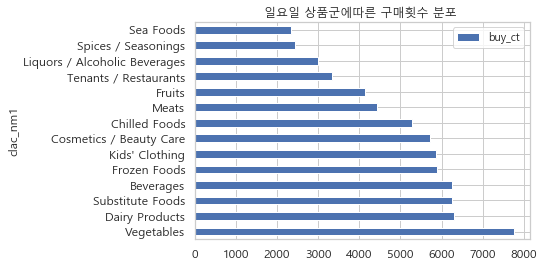

In [181]:
clac_nm1pre13.plot(kind="barh", title='일요일 상품군에따른 구매횟수 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 일요일 상품군에따른 구매횟수 분포.png", bbox_inches='tight')

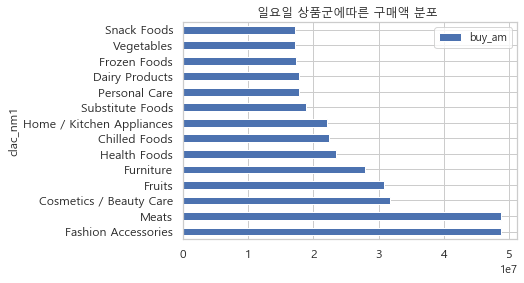

In [182]:
clac_nm1pre12.plot(kind="barh", title='일요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig("일요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

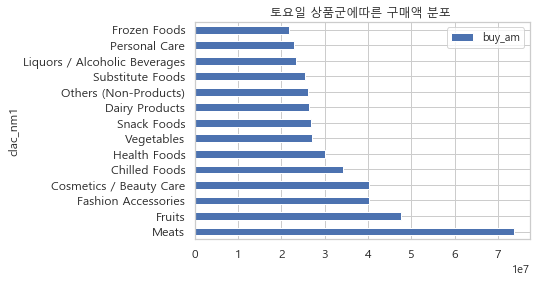

In [183]:
clac_nm1pre10.plot(kind="barh", title='토요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 토요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

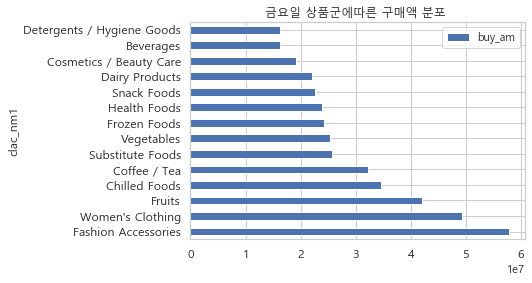

In [184]:
clac_nm1pre8.plot(kind="barh", title='금요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 금요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

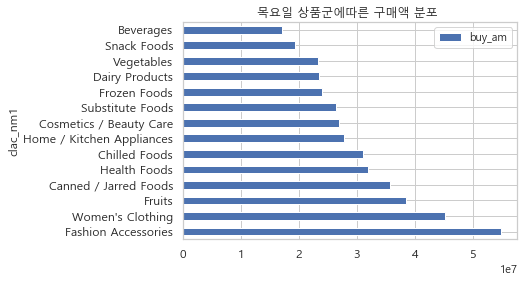

In [185]:
clac_nm1pre6.plot(kind="barh", title='목요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 목요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

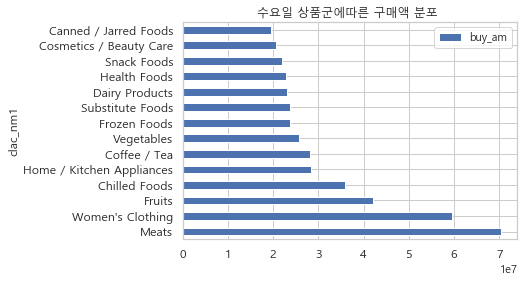

In [186]:
clac_nm1pre4.plot(kind="barh", title='수요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 수요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

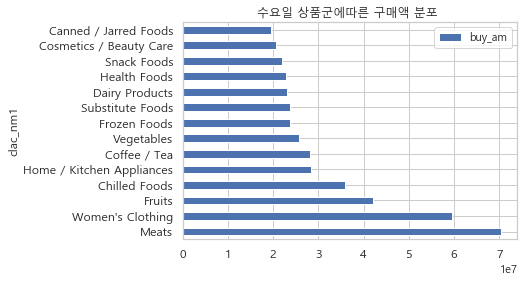

In [187]:
monc=clac_nm1pre4.plot(kind="barh", title='수요일 상품군에따른 구매액 분포 ', legend=True, fontsize=12)
#plt.xticks(rotation = 45 )
plt.savefig(" 수요일 상품군에따른 구매액 분포.png", bbox_inches='tight')

# 대분류에대하여 선호품목과 주요 구매시간대

In [65]:
merge_new = new.merge(PDI,how = "inner", on="pd_c")[["hour","clnt_id","pd_c","de_dt","clnt_gender","clnt_age","buy_am","buy_ct","clac_nm1","clac_nm2","clac_nm3"]]
merge_new['de_dt'] = pd.to_datetime(merge_new['de_dt'], format='%Y%m%d')
merge_new['weekday'] = merge_new["de_dt"].dt.dayofweek
cluster_a1=merge_new[["hour","clac_nm1","buy_am","clnt_age","clnt_gender"]]
cluster_a1=cluster_a1.groupby(["clac_nm1","hour","clnt_age","clnt_gender"]).sum()["buy_am"].reset_index()
clusterF_a=cluster_a1[(cluster_a1.clnt_gender=="F")&(cluster_a1.clnt_age=="10-20")]
clusterF_a2=cluster_a1[(cluster_a1.clnt_gender=="F")&(cluster_a1.clnt_age=="30")]
clusterF_a3=cluster_a1[(cluster_a1.clnt_gender=="F")&(cluster_a1.clnt_age=="40")]
clusterF_a4=cluster_a1[(cluster_a1.clnt_gender=="F")&(cluster_a1.clnt_age=="50-60")]
clusterM_a=cluster_a1[(cluster_a1.clnt_gender=="M")&(cluster_a1.clnt_age=="10-20")]
clusterM_a2=cluster_a1[(cluster_a1.clnt_gender=="M")&(cluster_a1.clnt_age=="30")]
clusterM_a3=cluster_a1[(cluster_a1.clnt_gender=="M")&(cluster_a1.clnt_age=="40")]
clusterM_a4=cluster_a1[(cluster_a1.clnt_gender=="M")&(cluster_a1.clnt_age=="50-60")]

In [80]:
c1=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Women's Clothing"),:]
c2=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Fashion Accessories"),:]
c3=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Meats"),:]
c4=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Cosmetics / Beauty Care"),:]
c5=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Fruits"),:]
c6=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Chilled Foods"),:]
c7=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Vegetables"),:]
c8=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Dairy Products"),:]
c9=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Substitute Foods"),:]
c10=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Personal Care"),:]
c11=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Frozen Foods"),:]
c12=clusterF_a.loc[(clusterF_a["clac_nm1"]=="Home / Kitchen Appliances"),:]
result_f1=pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12])

In [81]:

c11=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Fashion Accessories"),:]
c21=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Sport Fashion"),:]
c31=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Men's Clothing"),:]
c41=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Grains"),:]
c51=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Women's Clothing"),:]
c61=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Home / Kitchen Appliances"),:]
c71=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Vegetables"),:]
c81=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Dairy Products"),:]
c91=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Meats"),:]
c101=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Frozen Foods"),:]
c111=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Beverages"),:]
c121=clusterM_a.loc[(clusterM_a["clac_nm1"]=="Chilled Foods"),:]
result_M1=pd.concat([c11,c21,c31,c41,c51,c61,c71,c81,c91,c101,c111,c121])

In [82]:
d1=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Meats"),:]
d2=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Fashion Accessories"),:]
d3=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Fruits"),:]
d4=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Women's Clothing"),:]
d5=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Chilled Foods"),:]
d6=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Cosmetics / Beauty Care"),:]
d7=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Dairy Products"),:]
d8=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Snack Foods"),:]
d9=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Vegetables"),:]
d10=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Frozen Foods"),:]
d11=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Substitute Foods"),:]
d12=clusterF_a2.loc[(clusterF_a2["clac_nm1"]=="Furniture"),:]
result_f2=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12])

In [83]:
d11=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Coffee / Tea"),:]
d21=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Health Foods"),:]
d31=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Canned / Jarred Foods"),:]
d41=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Home / Kitchen Appliances"),:]
d51=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Fashion Accessories"),:]
d61=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Video / Audio System Electronics"),:]
d71=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Meats"),:]
d81=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Cosmetics / Beauty Care"),:]
d91=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Substitute Foods"),:]
d101=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Fruits"),:]
d111=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Women's Clothing"),:]
d121=clusterM_a2.loc[(clusterM_a2["clac_nm1"]=="Computers"),:]
result_m2=pd.concat([d11,d21,d31,d41,d51,d61,d71,d81,d91,d101,d111,d121])

In [84]:

e1=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Meats"),:]
e2=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Women's Clothing"),:]
e3=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Fashion Accessories"),:]
e4=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Fruits"),:]
e5=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Chilled Foods"),:]
e6=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Substitute Foods"),:]
e7=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Frozen Foods"),:]
e8=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Vegetables"),:]
e9=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Cosmetics / Beauty Care"),:]
e10=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Dairy Products"),:]
e11=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Snack Foods"),:]
e12=clusterF_a3.loc[(clusterF_a3["clac_nm1"]=="Health Foods"),:]
result_f3=pd.concat([e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12])

In [85]:
e11=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Coffee / Tea"),:]
e21=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Home / Kitchen Appliances"),:]
e31=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Meats"),:]
e41=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Outdoor / Leisure Activities"),:]
e51=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Fashion Accessories"),:]
e61=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Fruits"),:]
e71=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Canned / Jarred Foods"),:]
e81=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Chilled Foods"),:]
e91=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Substitute Foods"),:]
e101=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Frozen Foods"),:]
e111=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Snack Foods"),:]
e121=clusterM_a3.loc[(clusterM_a3["clac_nm1"]=="Dairy Products"),:]
result_m3=pd.concat([e11,e21,e31,e41,e51,e61,e71,e81,e91,e101,e111,e121])

In [86]:

g1=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Women's Clothing"),:]
g2=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Fashion Accessories"),:]
g3=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Meats"),:]
g4=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Fruits"),:]
g5=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Health Foods"),:]
g6=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Chilled Foods"),:]
g7=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Cosmetics / Beauty Care"),:]
g8=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Vegetables"),:]
g9=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Substitute Foods"),:]
g10=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Dairy Products"),:]
g11=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Personal Care"),:]
g12=clusterF_a4.loc[(clusterF_a4["clac_nm1"]=="Frozen Foods"),:]
result_f4=pd.concat([g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12])

In [87]:
g11=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Meats"),:]
g21=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Health Foods"),:]
g31=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Women's Clothing"),:]
g41=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Fruits"),:]
g51=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Refrigerators and Washing Machines"),:]
g61=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Computers"),:]
g71=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Fashion Accessories"),:]
g81=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Chilled Foods"),:]
g91=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Canned / Jarred Foods"),:]
g101=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Vegetables"),:]
g111=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Substitute Foods"),:]
g121=clusterM_a4.loc[(clusterM_a4["clac_nm1"]=="Frozen Foods"),:]
result_m4=pd.concat([g11,g21,g31,g41,g51,g61,g71,g81,g91,g101,g111,g121])

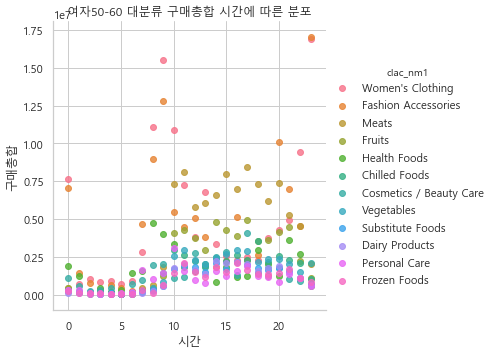

In [188]:
sns.lmplot('hour','buy_am',data=result_f4,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="여자50-60 대분류 구매총합 시간에 따른 분포")
plt.savefig("여자50-60 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

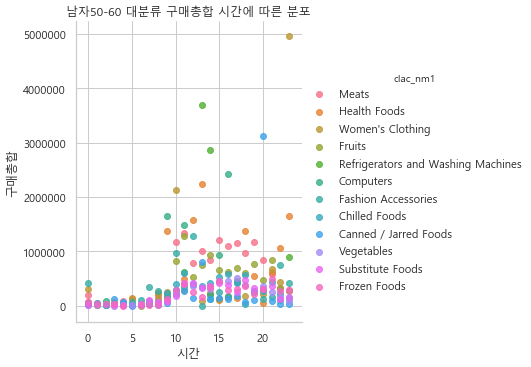

In [189]:
sns.lmplot('hour','buy_am',data=result_m4,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="남자50-60 대분류 구매총합 시간에 따른 분포")
plt.savefig("남자50-60 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

In [ ]:
sns.lmplot('hour','buy_am',data=result_f3,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="여자40 대분류 구매총합 시간에 따른 분포")
plt.savefig("여자40 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

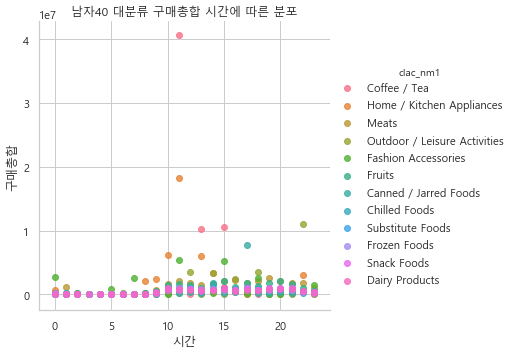

In [190]:
sns.lmplot('hour','buy_am',data=result_m3,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="남자40 대분류 구매총합 시간에 따른 분포")
plt.savefig("남자40 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

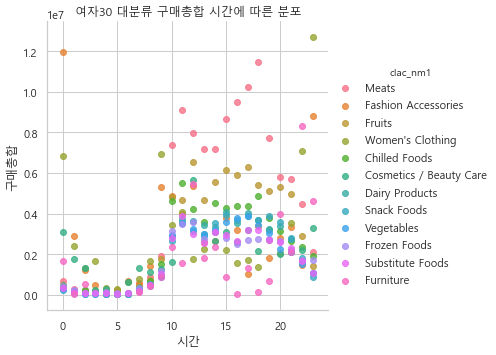

In [191]:
sns.lmplot('hour','buy_am',data=result_f2,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="여자30 대분류 구매총합 시간에 따른 분포")
plt.savefig("여자30 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

In [ ]:
sns.lmplot('hour','buy_am',data=result_f2,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="여자30 대분류 구매총합 시간에 따른 분포")
plt.savefig("여자30 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

In [ ]:
sns.lmplot('hour','buy_am',data=result_f2,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="여자30 대분류 구매총합 시간에 따른 분포")
plt.savefig("여자30 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

In [ ]:
sns.lmplot('hour','buy_am',data=result_M1,fit_reg=False,
          hue='clac_nm1').set(ylabel='구매총합',xlabel='시간',title="남자10-20 대분류 구매총합 시간에 따른 분포")
plt.savefig("남자10-20 구매총합 시간에 따른 분포"+".png", bbox_inches='tight')

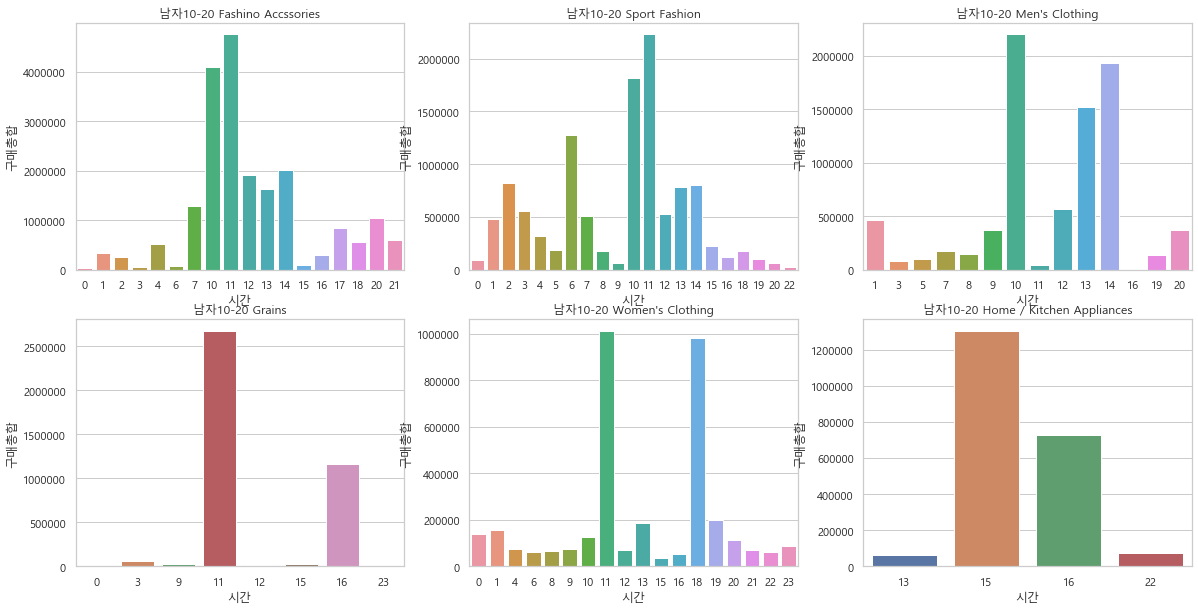

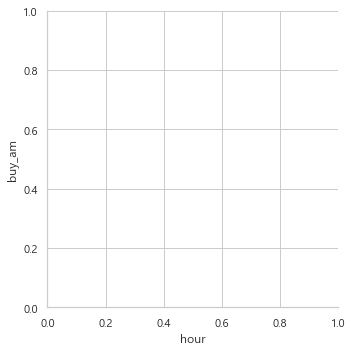

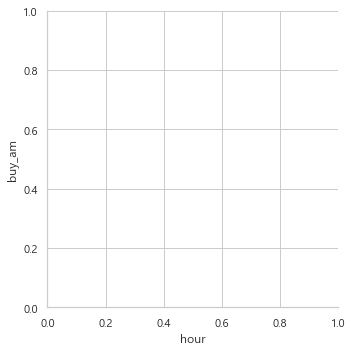

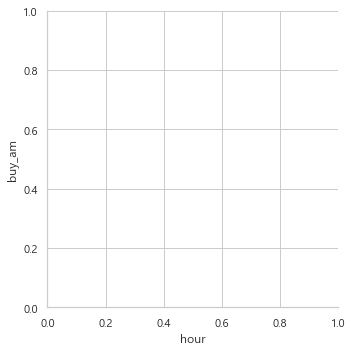

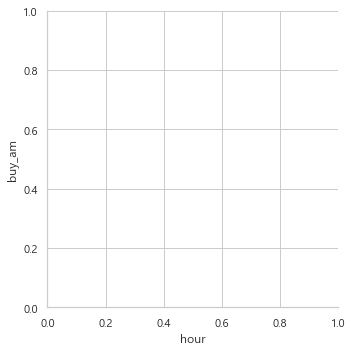

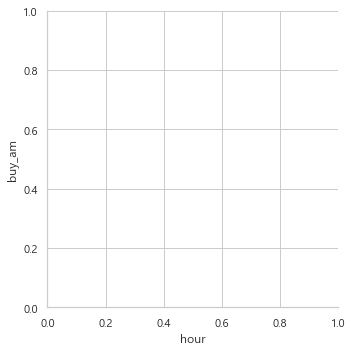

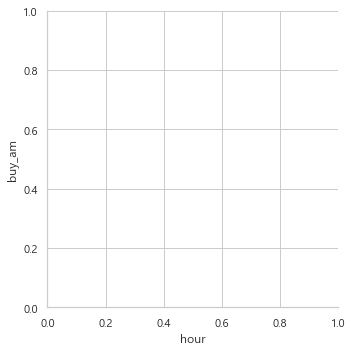

In [192]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=c11, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=c21, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=c31, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=c41, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=c51, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=c61, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Fashino Accssories")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Sport Fashion")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Men's Clothing")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Grains")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Women's Clothing")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Home / Kitchen Appliances")
figure.savefig("남자10 20 상위6개"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=c71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=c81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=c91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=c101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=c111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=c121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Vegetables")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Dairy Products")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Beverages")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Chilled Foods")

figure.savefig("남자10 20 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=c71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=c81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=c91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=c101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=c111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=c121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Vegetables")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Dairy Products")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Beverages")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Chilled Foods")

figure.savefig("남자10 20 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=c71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=c81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=c91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=c101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=c111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=c121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Vegetables")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Dairy Products")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Beverages")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Chilled Foods")

figure.savefig("남자10 20 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=c71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=c81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=c91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=c101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=c111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=c121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Vegetables")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Dairy Products")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Beverages")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자10-20 Chilled Foods")

figure.savefig("남자10 20 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=d71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=d81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=d91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=d101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=d111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=d121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자30 Meats")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자30 Cosmetics / Beauty Care")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자30 Substitute Foods")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자30 Fruits")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자30 Women's Clothing")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자30 Computers")
figure.savefig("남자30 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=d1, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=d2, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=d3, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=d4, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=d5, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=d6, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자30 Meats")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자30 Fashion Accessories")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자30 Fruits")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자30 Women's Clothing")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자30 Chilled Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자30 Cosmetics / Beauty Care")
figure.savefig("여자30 상위6개"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=d7, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=d8, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=d9, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=d10, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=d11, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=d12, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자30 Dairy Products")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자30 Snack Foods")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자30 Vegetables")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자30 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자30 Substitute Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자30 Furniture")
figure.savefig("여자30 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=e11, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=e21, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=e31, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=e41, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=e51, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=e61, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자40 Coffee / Tea")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자40 Home / Kitchen Appliances")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자40 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자40 Outdoor / Leisure Activities")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자40 Fashion Accessories")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자40 Fruits")
figure.savefig("남자40 상위6개"+".png", bbox_inches='tight')

In [ ]:


figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=e71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=e81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=e91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=e101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=e111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=e121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자40 Canned / Jarred Foods")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자40 Chilled Foods")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자40 Substitute Foods")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자40 Frozen Foods")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자40 Snack Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자40 Dairy Products")
figure.savefig("남자40 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=e1, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=e2, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=e3, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=e4, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=e5, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=e6, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자40 Meats")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자40 Women's Clothing")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자40 Fashion Accessories")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자40 Fruits")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자40 Chilled Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자40 Substitute Foods")
figure.savefig("여자40 상위6개"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=e7, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=e8, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=e9, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=e10, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=e11, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=e12, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자40 Frozen Foods")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자40 Vegetables")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자40 Cosmetics / Beauty Care")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자40 Dairy Products")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자40 Snack Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자40 Health Foods")
figure.savefig("여자40 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=g11, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=g21, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=g31, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=g41, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=g51, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=g61, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Meats")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Health Foods")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Women's Clothing")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Fruits")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Refrigerators and Washing Machines")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Computers")
figure.savefig("남자50 60 상위6개"+".png", bbox_inches='tight')

In [ ]:


figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=g71, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=g81, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=g91, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=g101, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=g111, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=g121, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Fashion Accessories")
ax2.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Chilled Foods")
ax3.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Canned / Jarred Foods")
ax4.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Vegetables")
ax5.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Substitute Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="남자50-60 Frozen Foods")
figure.savefig("남자50 60 상위6개(1)"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=g1, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=g2, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=g3, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=g4, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=g5, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=g6, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Women's Clothing")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Fashion Accessories")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Meats")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Fruits")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Health Foods")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Chilled Foods")
figure.savefig("여자50 60 상위6개"+".png", bbox_inches='tight')

In [ ]:

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.catplot(data=g7, x="hour", y="buy_am", ax=ax1,kind='bar')
sns.catplot(data=g8, x="hour", y="buy_am", ax=ax2,kind='bar')
sns.catplot(data=g9, x="hour", y="buy_am", ax=ax3,kind='bar')
sns.catplot(data=g10, x="hour", y="buy_am", ax=ax4,kind='bar')
sns.catplot(data=g11, x="hour", y="buy_am", ax=ax5,kind='bar')
sns.catplot(data=g12, x="hour", y="buy_am", ax=ax6,kind='bar')

ax1.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Cosmetics / Beauty Care")
ax2.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Vegetables")
ax3.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Substitute Foods")
ax4.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Dairy Products")
ax5.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Personal Care")
ax6.set(ylabel='구매총합',xlabel='시간',title="여자50-60 Frozen Foods")
figure.savefig("여자50 60 상위6개(1)"+".png", bbox_inches='tight')

# 성별 카테고리 구매총합

In [71]:
merge52=merge51.merge(CTI1,how = "inner", on="clnt_id")[["buy_am","clac_nm1","clac_nm2","clac_nm3","clnt_gender","clnt_age","count"]]

In [78]:
#여자연령대별 카테고리 구매금액 총합
daf2=merge52[merge52["clnt_gender"]=="F"].groupby(["clac_nm1","clac_nm2","clac_nm3","clnt_age"]).sum()["buy_am"].sort_values(ascending=False)
daf2=pd.DataFrame(daf2)
#남자연령대별 카테고리 구매금액 총합
dam2=merge52[merge52["clnt_gender"]=="M"].groupby(["clac_nm1","clac_nm2","clac_nm3","clnt_age"]).sum()["buy_am"].sort_values(ascending=False)
dam2=pd.DataFrame(dam2)
daf2

,,,,buy_am
clac_nm1,clac_nm2,clac_nm3,clnt_age,
Others (Non-Products),Others,Others,40,30774490
Fashion Accessories,Women's Bags,Women's Shoulder Bags,40,26618120
Women's Clothing,Women's Outwear,Women's Coats,40,25683920
Others (Non-Products),Others,Others,50-60,25108800
Grains,Rice,Rice,40,23406930
...,...,...,...,...
Travel / Leisure Services,Travel and Leisure,Oversea Travel Packages,30,0
Finance / Insurance Service,Insurance Services,Other Insurance,40,0
Travel / Leisure Services,Travel and Leisure,Oversea Travel Packages,40,0


In [75]:
cluster=merge_new[["hour","clac_nm1","buy_am","clnt_age","clnt_gender"]]
cluster_g=cluster.groupby(["clac_nm1","hour","clnt_gender"]).sum()["buy_am"].reset_index()
cluster_a=cluster.groupby(["clac_nm1","hour","clnt_age","clnt_gender"]).sum()["buy_am"].reset_index()

clusterF=cluster_g[cluster_g.clnt_gender=="F"]
clusterM=cluster_g[cluster_g.clnt_gender=="M"]


clusterF_a=cluster_a[(cluster_a.clnt_gender=="F")&(cluster_a.clnt_age=="10-20")]
clusterF_a2=cluster_a[(cluster_a.clnt_gender=="F")&(cluster_a.clnt_age=="30")]
clusterF_a3=cluster_a[(cluster_a.clnt_gender=="F")&(cluster_a.clnt_age=="40")]
clusterF_a4=cluster_a[(cluster_a.clnt_gender=="F")&(cluster_a.clnt_age=="50-60")]
clusterM_a=cluster_a[(cluster_a.clnt_gender=="M")&(cluster_a.clnt_age=="10-20")]
clusterM_a2=cluster_a[(cluster_a.clnt_gender=="M")&(cluster_a.clnt_age=="30")]
clusterM_a3=cluster_a[(cluster_a.clnt_gender=="M")&(cluster_a.clnt_age=="40")]
clusterM_a4=cluster_a[(cluster_a.clnt_gender=="M")&(cluster_a.clnt_age=="50-60")]


In [76]:

f1=clusterF.loc[(clusterF["clac_nm1"]=="Meats"),:]
f2=clusterF.loc[(clusterF["clac_nm1"]=="Women's Clothing"),:]
f3=clusterF.loc[(clusterF["clac_nm1"]=="Fashion Accessories"),:]
f4=clusterF.loc[(clusterF["clac_nm1"]=="Fruits"),:]
f5=clusterF.loc[(clusterF["clac_nm1"]=="Chilled Foods"),:]
f6=clusterF.loc[(clusterF["clac_nm1"]=="Cosmetics / Beauty Care"),:]
f7=clusterF.loc[(clusterF["clac_nm1"]=="Vegetables"),:]
f8=clusterF.loc[(clusterF["clac_nm1"]=="Substitute Foods"),:]
f9=clusterF.loc[(clusterF["clac_nm1"]=="Dairy Products"),:]
f10=clusterF.loc[(clusterF["clac_nm1"]=="Frozen Foods"),:]
f11=clusterF.loc[(clusterF["clac_nm1"]=="Health Foods"),:]
f12=clusterF.loc[(clusterF["clac_nm1"]=="Snack Foods"),:]
result_f=pd.concat([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12])

m1=clusterM.loc[(clusterM["clac_nm1"]=="Coffee / Tea"),:]
m2=clusterM.loc[(clusterM["clac_nm1"]=="Home / Kitchen Appliances"),:]
m3=clusterM.loc[(clusterM["clac_nm1"]=="Fashion Accessories"),:]
m4=clusterM.loc[(clusterM["clac_nm1"]=="Meats"),:]
m5=clusterM.loc[(clusterM["clac_nm1"]=="Health Foods"),:]
m6=clusterM.loc[(clusterM["clac_nm1"]=="Canned / Jarred Foods"),:]
m7=clusterM.loc[(clusterM["clac_nm1"]=="Fruits"),:]
m8=clusterM.loc[(clusterM["clac_nm1"]=="Women's Clothing"),:]
m9=clusterM.loc[(clusterM["clac_nm1"]=="Cosmetics / Beauty Care"),:]
m10=clusterM.loc[(clusterM["clac_nm1"]=="Substitute Foods"),:]
m11=clusterM.loc[(clusterM["clac_nm1"]=="Chilled Foods"),:]
m12=clusterM.loc[(clusterM["clac_nm1"]=="Outdoor / Leisure Activities"),:]
m12=clusterM.loc[(clusterM["clac_nm1"]=="Snack Foods"),:]
result_m=pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12])